#### Столбцы данных



- Страна - страна происхождения вина.
- Описание — описание вкусового профиля вина.
- Обозначение - виноградник, откуда берется виноград для вина.
- Баллы - количество баллов на которое критик журнала Wine Enthusiast оценил вино по шкале от 1 до 100.
- Цена - стоимость одной бутылки вина.
- Провинция — провинция или штат, из которого произведено вино.
- Регион 1 — зона виноделия в провинции или штате (например, долина Напа в Калифорнии).
- Регион 2 — (не обязательно) более конкретный регион в винодельческой области (например, Резерфорд в долине Напа).
- Разновидность — сорт винограда, из которого делают вино (например, Пино Нуар).
- Винодельня — винодельня, производящая вино.

### Шаг 1. Предобработка данных

### Шаг 2. Подготовка данных
### Шаг 3. Провести исследовательский анализ данных

* Определить, какие сорта лидируют по рейтингам. Найти популярные сорта по региону.
* Выбрать сорта с наибольшими ценами. Для каждого региона найдите среднюю цену вина.
* Определить, популярные сорта вина в бюджетном сегменте.
* Определить, какие сорта вина лидируют по рейтингам.
* Построить график «ящик с усами» по рейтингам в разбивке по странам, по сортам вина.
* Выявить закономерность влияния на цену цвета и рейтинга. Построить диаграмму рассеяния и посчитать корреляцию.


### Шаг 4. Составить портрет потребителя каждого региона

Определить для пользователя каждого континента :
* Самые популярные сорта (топ-5).
* Влияет ли рейтинг на цены по регионам

### Шаг 5. Провести исследование статистических показателей

* Выполнить подсчитать среднего количества, дисперсии и стандартного отклонения для цен на продукт различных регионов. Построить гистограммы. Описать распределения.
* Построить линейную регрессию зависимости между ценой продукта и его рейтингом.

### Шаг 6. Проверка гипотез

* H0: Средние пользовательские рейтинги красного и белого вина одинаковые.
* H1:Средние пользовательские рейтинги красного и белого вина разные.


* H0:Средние цены двух популярных сортов вина одинаковые.
* H1:Средние цены двух популярных сортов вина разные.



### Вывод

#  <a name="1">1.Предобработка данных</a>

Импортируем необходимые библиотеки

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import scipy.stats as st
# импорт библиотеки warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:

df = pd.read_csv("wine_reviews.csv")
df.dropna(subset= ['price','points'], axis =0, inplace = True)
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek
...,...,...,...,...,...,...,...,...,...,...
19994,US,"A little too strong in feline spray character,...",Grand Reserve,84,20.0,California,Mendocino County,Mendocino/Lake Counties,Sauvignon Blanc,Kendall-Jackson
19995,France,"Firm wine, with tannins to match the chunky st...",Mansois,88,12.0,Southwest France,Marcillac,NaN,Mansois,Lionel Osmin & Cie
19996,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Napa-Sonoma,Pinot Noir,Bouchaine
19997,Italy,Lighea is a terrific wine and an excellent pai...,Lighea,87,20.0,Sicily & Sardinia,Sicilia,NaN,Zibibbo,Donnafugata


Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения. Признак points и price числовые. С помощью библиотеки seaborn построим тепловую карту для визуализации данных.

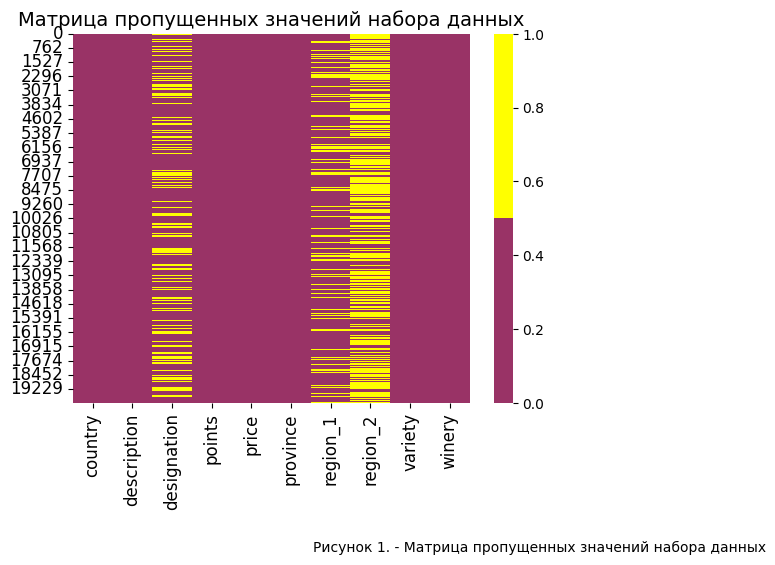

In [6]:
colours = ['#993366', '#FFFF00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
# Decorations
plt.title('Матрица пропущенных значений набора данных', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.5, -0.2, "Рисунок 1. - Матрица пропущенных значений набора данных")
plt.show()

In [7]:
mean_price_by_countries = df.groupby('country').agg({'price':'mean'})
mean_price_by_countries

,price
country,
Argentina,22.502747
Australia,30.607780
Austria,31.691395
Bosnia and Herzegovina,12.000000
Brazil,24.666667
Bulgaria,10.600000
Canada,45.750000
Chile,19.629677
China,27.000000


Добавим названия континентов:

In [8]:
country_to_continent = {
'Italy':'Europe',
'Portugal':'Europe',
'US':'North America',
'Spain':'Europe',
'France':'Europe',
'Germany':'Europe',
'Argentina':'Latin America',
'Chile':'Latin America',
'Australia': 'Oceania',
'Austria': 'Europe',
'South Africa': 'Africa',
'New Zealand': 'Oceania',
'Israel': 'Asia',
'Hungary':'Europe',
'Greece':'Europe',
'Romania':'Europe',
'Mexico':'Latin America',
'Canada':'North America',
'Turkey': 'Asia',
'Czech Republic': 'Europe',
'Slovenia': 'Europe',
'Luxembourg': 'Europe',
'Croatia': 'Europe',
'Georgia':'Europe',
'Uruguay': 'Latin America',
'England': 'Europe',
'Lebanon': 'Asia',
'Serbia': 'Europe',
'Brazil': 'Latin America',
'Moldova': 'Europe',
'Morocco':'Africa',
'Peru':'Latin America',
'India':'Asia',
'Bulgaria':'Europe',
'Cyprus': 'Europe',
'Armenia':'Asia',
'Switzerland':'Europe',
'Bosnia and Herzegovina':'Europe',
'Ukraine':'Europe',
'Slovakia':'Europe',
'Macedonia':'Europe',
'China':'Asia',
'Egypt':'Africa'
}

In [9]:
df ['country_to_continent'] = df ['country'].map(country_to_continent)
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery,country_to_continent
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch,North America
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla,Europe
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte,Europe
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano,Europe
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek,North America
...,...,...,...,...,...,...,...,...,...,...,...
19994,US,"A little too strong in feline spray character,...",Grand Reserve,84,20.0,California,Mendocino County,Mendocino/Lake Counties,Sauvignon Blanc,Kendall-Jackson,North America
19995,France,"Firm wine, with tannins to match the chunky st...",Mansois,88,12.0,Southwest France,Marcillac,NaN,Mansois,Lionel Osmin & Cie,Europe
19996,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Napa-Sonoma,Pinot Noir,Bouchaine,North America
19997,Italy,Lighea is a terrific wine and an excellent pai...,Lighea,87,20.0,Sicily & Sardinia,Sicilia,NaN,Zibibbo,Donnafugata,Europe


#  <a name="2"> 2. Исследовательский анализ данных</a>


Найдем наиболее дорогие вина:

In [10]:
expensive_wine = df.nlargest(5, 'price')
expensive_wine

,country,description,designation,points,price,province,region_1,region_2,variety,winery,country_to_continent
13188,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour,Europe
323,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug,Europe
4324,Austria,"Wet earth, rain-wet stones, damp moss, wild sa...",Ried Loibenberg Smaragd,94,1100.0,Wachau,NaN,NaN,Grüner Veltliner,Emmerich Knoll,Europe
19501,France,"While there is certainly plenty of wood here, ...",NaN,95,850.0,Bordeaux,Saint-Émilion,NaN,Bordeaux-style Red Blend,Château Ausone,Europe
8493,Hungary,"Surprisingly subtle, yet maddeningly complex, ...",Essencia,94,764.0,Tokaji,NaN,NaN,Furmint,Royal Tokaji,Europe


Нйдем наиболее популярные по рейтигу виды вин:

In [11]:
gr_by_type = df.groupby('variety').agg({'points':'mean'})
gr_by_type.sort_values(['points'], ascending = False)

,points
variety,
Tokay,96.0
Syrah-Viognier,94.0
Sauvignon Gris,94.0
Muskat Ottonel,94.0
Roussanne-Viognier,93.0
...,...
Pignoletto,82.0
Aidani,82.0
Meoru,81.0


Рассмотрим средний рейтинг различных видов вина по регионам:

In [12]:
gr_by_region = df.groupby(['region_1','variety']).agg({'points':'mean'})
gr_by_region

points
region_1          variety                            
Adelaida District Mourvèdre                 90.000000
                  Zinfandel                 88.500000
Adelaide          Bordeaux-style Red Blend  91.000000
                  Chardonnay                86.333333
                  Pinot Noir                84.000000
...                                               ...
Yountville        Chardonnay                86.500000
                  Gewürztraminer            87.000000
                  Sauvignon Blanc           88.000000
                  Sparkling Blend           92.000000
Zonda Valley      Malbec                    88.000000

[3030 rows x 1 columns]

Рассмторим средние цены на вина по каждому региону:

In [13]:
mean_price_by_region = df.groupby('region_1').agg({'price':'mean'})
mean_price_by_region.sort_values('price',ascending = False)

,price
region_1,
Montrachet,676.500000
Chambertin Clos de Bèze,385.000000
Chevalier-Montrachet,380.000000
Bâtard-Montrachet,335.000000
Bonnes-Mares,325.000000
...,...
Côtes-du-Ventoux,8.333333
Riviera Ligure di Ponente,8.000000
Australia-New Zealand,8.000000


Найдем наиболее популярные вина в бюджетном сегмете:

In [14]:
len_df = df.shape[0]
len_df
econom_len = int(round((len_df * 0.55),0))
econom_len

10009

In [15]:
df_econom = df.sort_values('price',).iloc[:econom_len]
df_popular_econom = df_econom.groupby('variety').agg({'points':'mean'}).nlargest(10,'points')
df_popular_econom

,points
variety,
Albana,92.0
Black Monukka,92.0
Carricante,92.0
Grenache-Shiraz,92.0
Verduzzo,92.0
Gros and Petit Manseng,91.5
Malbec-Tannat,91.0
Roter Veltliner,91.0
Roussanne-Grenache Blanc,91.0


Построим график «ящик с усами» по рейтингам в разбивке по странам, по сортам вина.

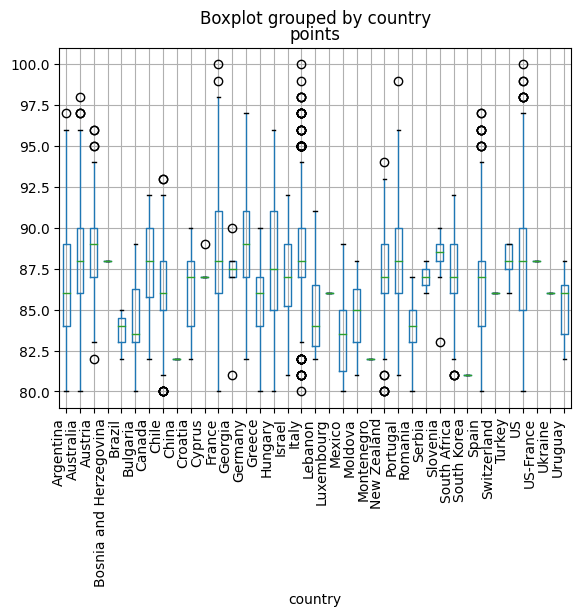

In [16]:
bp = df.boxplot(column = 'points', by = 'country')
plt.xticks(rotation=90, ha='right') 
plt.show(bp)


#  <a name="3"> 3. Составление портрета пользователя..</a>

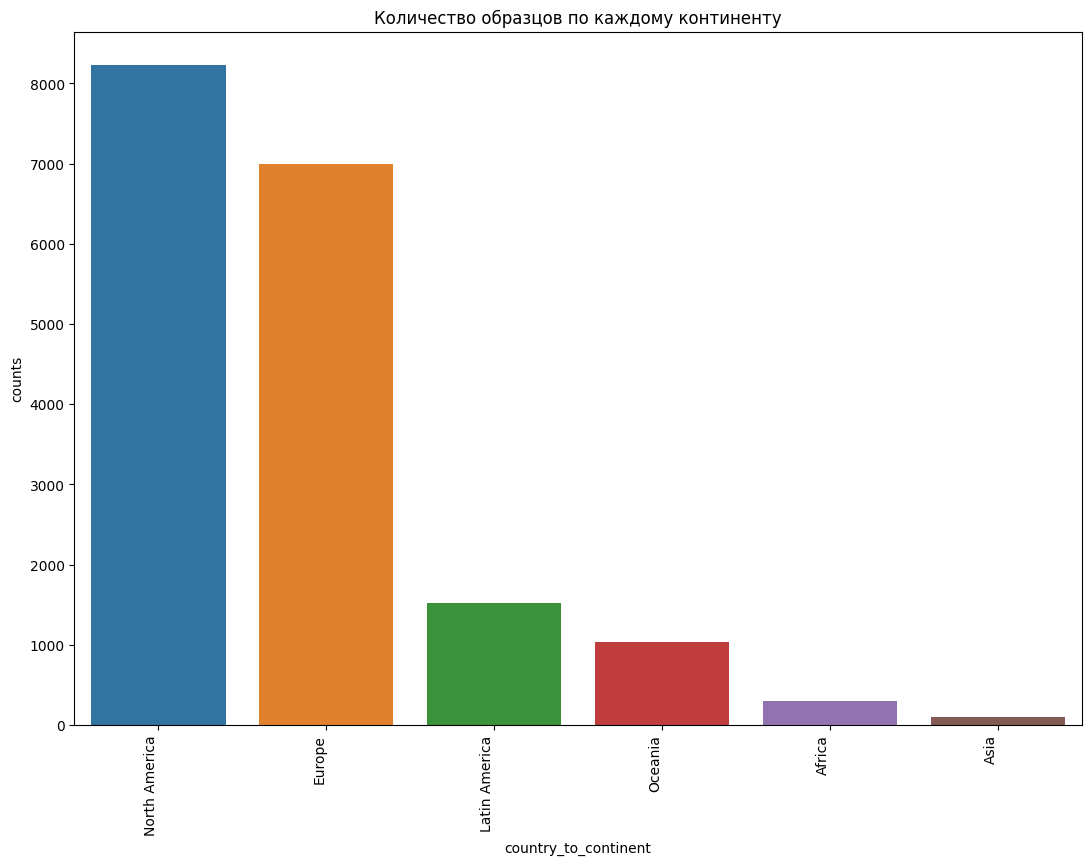

In [25]:
df_country = df['country_to_continent'].value_counts().to_frame()
df_country.reset_index(inplace=True)
df_country.columns = ['country_to_continent','counts']
fig, ax = plt.subplots(figsize=(13,9));
sns.barplot(data = df_country, x='country_to_continent',y='counts',ax=ax).set_title('Количество образцов по каждому континенту');
plt.xticks(rotation=90, ha='right');

In [18]:
df.groupby(by='country_to_continent')['points'].max().sort_values(ascending=False)

country_to_continent
Europe           100
North America    100
Oceania           98
Latin America     97
Africa            92
Asia              92
Name: points, dtype: int64

Вина, лидирующие по странам. Америка, Италия и Португалия получили самый большой рейтинг.

In [19]:
df.groupby(by='country')['points'].max().sort_values(ascending=False)

country
US                        100
France                    100
Italy                     100
Portugal                   99
Australia                  98
Argentina                  97
Spain                      97
Germany                    97
Hungary                    96
Austria                    96
New Zealand                94
Chile                      93
South Africa               92
Canada                     92
Israel                     92
Lebanon                    91
Greece                     90
Georgia                    90
Croatia                    90
Slovenia                   90
Cyprus                     89
Mexico                     89
Turkey                     89
Bulgaria                   89
US-France                  88
Bosnia and Herzegovina     88
Serbia                     88
Moldova                    88
Uruguay                    88
Romania                    87
Switzerland                86
Luxembourg                 86
Ukraine                    86
Br

Определим самые популярные бюджетные марки вина.

In [20]:
df_econom = df.sort_values('price',).iloc[:econom_len]
df_popular_econom = df_econom.groupby('variety').agg({'points':'mean'}).nlargest(10,'points')
df_popular_econom

,points
variety,
Albana,92.0
Black Monukka,92.0
Carricante,92.0
Grenache-Shiraz,92.0
Verduzzo,92.0
Gros and Petit Manseng,91.5
Malbec-Tannat,91.0
Roter Veltliner,91.0
Roussanne-Grenache Blanc,91.0


#  <a name="4"> 4. Исследование статистических показателей.</a>

Диапазон рейтинга на самые популярные вина

In [21]:
df.groupby(['variety']).points.agg([len,'mean', min, max]).sort_values(by='len', ascending=False).head(5)

,len,mean,min,max
variety,,,,
Pinot Noir,1855,88.720216,80,98
Chardonnay,1799,87.655364,80,100
Cabernet Sauvignon,1624,88.046182,80,98
Red Blend,1246,88.009631,80,97
Sauvignon Blanc,813,86.954490,80,94


Диапазон цен на вина в разных странах. Отклонение медианы от средней цены.

In [22]:
df.groupby(['country']).price.agg([len, 'median','mean', min, max]).sort_values(by='len', ascending=True)

,len,median,mean,min,max
country,,,,,
US-France,1,50.0,50.000000,50.0,50.0
Switzerland,1,19.0,19.000000,19.0,19.0
Bosnia and Herzegovina,1,12.0,12.000000,12.0,12.0
South Korea,1,11.0,11.000000,11.0,11.0
Montenegro,1,10.0,10.000000,10.0,10.0
Luxembourg,1,36.0,36.000000,36.0,36.0
Ukraine,1,13.0,13.000000,13.0,13.0
Serbia,2,16.5,16.500000,15.0,18.0
China,2,27.0,27.000000,27.0,27.0


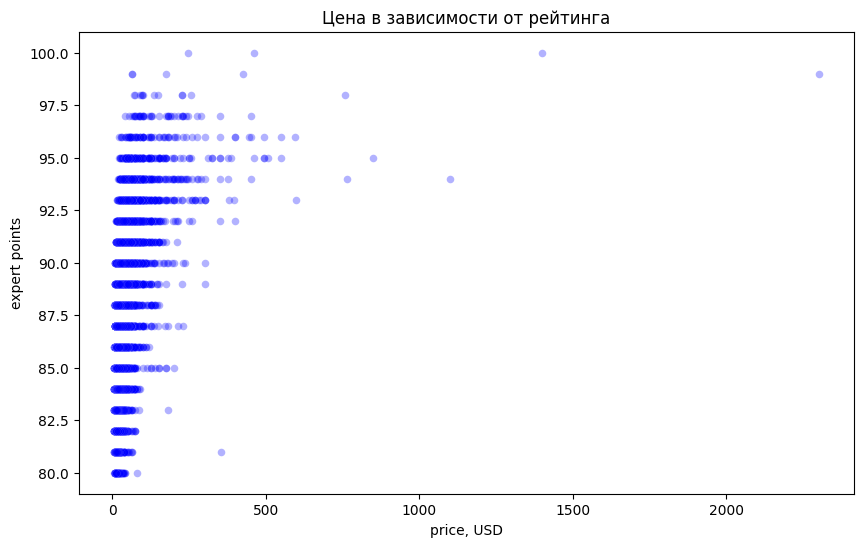

In [23]:
y = df.points
x = df.price
plt.figure(figsize=(10, 6))
plt.scatter(x, y, 30, 'blue', alpha=0.3, edgecolor='white', linewidth=0.1)
plt.title('Цена в зависимости от рейтинга')
plt.xlabel('price, USD')
plt.ylabel('expert points');

In [24]:
data_to_plot = df.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(10,8))
sns.pointplot(x = data_to_plot.points ,y = data_to_plot.index, color='maroon', orient='h')
plt.title('Средний рейтинг по стране')
plt.xlabel('Points');
plt.figtext(0.5, 0 , "Рисунок 9. - Зависимость рейтинг от страны" )

TypeError: Could not convert Opens with sweet berry aromas that are inviting yet generic. The palate has plenty of acidity, making this Merlot food-friendly but racy on its own. Flavors of black cherry and dark plums are juicy, and there's a touch of spice and chocolate late.Vanilla and floral aromas have a suspicious artificiality to them, and in the mouth it's a sweet, sugary ride toward a cloying finish.Muddy plum and berry aromas lead to a sharp, rugged palate. Tart plum and pie cherry flavors end raw, rough and bitter.Aromas of rose hips, tomato leaf, raisin and black cherry get this fuller-bodied Pinot going on its way to a chunky palate of ripe raspberry, plum and creamy oak. There's length and a smooth mouthfeel, and it avoids common New World pot holes like faux butter or popcorn-like flavors. Drink now.Composed up front, with floral aromas matching wits with dry herb notes and solid berry fruit scents. The palate is snappy and crisp, with focus and narrow, tight flavors of raspberry and plum blended with vanilla. Bright and juicy throughout, with vanilla and toast on the finish.Fresh, inviting raspberry, strawberry and tempered vanilla aromas set up a snappy, equally fresh palate of cherry and raspberry. There's no excess heft, beef, extract or color to this wine; it's restrained but not miserly. And it finishes crisp and flashy. Well made and likely good with food.Sweet and candied on the nose, with marshmallow, cotton candy, chocolate-dipped cherry and dustiness. The palate has a pure feel and good ripeness, with flavors of herbal berry, toast, coffee and spice. Warm, chocolaty and oaky, with a lasting mocha flavor.Dark as night, with a rich, round, deep nose. Overt on the palate, with cherry, blackberry and plum. Juicy enough, with chewy tannins and firm acidity. Beefy enough to match with any meat and dark enough to substitute for paint. Imported by Frederick Wildman & Sons, Ltd.Layered aromas of cassis, berry, coffee and mocha come with regional Cafayate green notes. The palate is lively and offers ribald acidity along with red plum, berry, vanilla, spice and toast flavors. Turns more oaky the longer it's open, with vanilla and dill on the finish.Monteviejo, one of the Clos de los Siete wineries, has entered the unofficial “fun Malbec” category with Festivo, which has a stemmy, slightly burnt character that is present from start to finish. Along the way there are leathery black fruit flavors, herbal qualities and a good mouthfeel. Decent wine but decidedly herbal and stemmy.From a 50+-year-old vineyard in La Consulta in the Uco Valley comes this bold, seriously built Malbec. Black cherry and coconut aromas settle in nicely, followed by forward raspberry, mocha and coffee notes. Great acidity, tannic foundation, structure and fillings; it's like a happy house. Drink from 2011 through 2015.Aromas of medicinal cassis and plum show mild latex accents, but the wine is concentrated and solid on the palate, with cola, cassis and black fruit flavors. Medium bodied and fairly long on the palate, with cough drop, cassis and a pretty good feel to the finish. Equal parts Malbec and Cabernet Sauvignon.Simple berry aromas are generic. This is dark on the palate, with black-fruit flavors that are standard and don't show much character. A lightly toasted finish is solid and not too choppy.Malbec and Bonarda are the lead grapes in this four-variety blend that shows improvement from the 2004, which was tough. Loads of ripe, dark fruit lead the way, with chewy, dense berry flavors coming next. It's bolstered by warm, oaky hints that settle on mocha and spice, so it fits the familiar style of what is good Mendoza wine.Aromas of prune, raisin and black plum are full and gritty. A chunky full-bodied palate feels grabby, while this tastes of generic blackberry, burnt coffee and dark chocolate. A steady plump, rubbery finish closes the show.Overt oak is the first thing you encounter on the nose, but underneath the heavy wood covering is a polished and sincere wine. The mouth is lively and juicy, with commendable plum and raspberry flavors. And while the finish is sort of basic in its vanilla and chocolate character, it has a nice feel to it. A wine with virtues but maybe a touch too much new oak.A bright purple luster draws you in, and the nose is bright, clean, focused and full of wild blackberry. Balanced in the mouth, with size and tannin but plenty of acidity and fruit. Tastes of blackberry, vanilla cream, molasses and spice, and the finish brings it on home. Sincere and excellent for the price.Smells like a can of green beans, or maybe it's canned peas. Either way, the nose is a siren call of what's to come: celery, acid, lime, asparagus and canned peas. No thank you.Jumpy and leathery at first, although time in the glass settles it down. The palate offers blackberry as the lead flavor, although there's some lemon peel and citrus in the background. Finishes simple and short.Even if this full-bodied Cab starts with some eggy, pastry-like aromas, it soon finds its form. The nose brings char and baked black fruit, while the palate is full of creamy blackberry and brown sugar flavors. Rather rich and ripe, with medium tannins and mild acidity. Drink sooner than later.Roasted berry aromas are stalky at first but come around. This feels round but only marginally structured. Creamy ripe generic flavors of berry and cherry finish solid with some heat.Aggressive lemon-lime aromas are itchy, and the nose turns grassy and green. Overactive in the mouth, and tough to hold on the palate. Just at the level of acceptable; warning signs have been posted.Crisp almost scratchy aromas of herbal red fruits are a bit strained. This feels solid, with ample volume. Earthy flavors of tomato sauce, mixed spices, stewed plum and cassis finish long and herbal, with some grace.A bit sweaty smelling, with pinched grapefruit aromas and distant citrus. The flavors say generic apple and lime, and there's a flatness to it. It's a little sugary as well. OK for a wine with pronounced low acidity.This is La Rural's top line, and before we've been a fan of the Malbec. But this wine has serious balance issues; it's acidic and sour at the core, with heavy oak and not enough flesh. Hails from the cooler Tupungato region, something that's evident in the wine's thin structure.Smells like raspberry or strawberry Kool-Aid, with appropriately “funky” flavors of rhubarb, raspberry and burnt sugar. The mouthfeel is rather scouring and acidic.Round and floral, with melon and other simple, clean aromas. Good mouthfeel, proper acidity and basic, likable flavors of citrus, green apple, green banana and tropical fruits make it a good quaffer and a good value.Tropical and zesty on the nose, with a big shot of lemon blossom and a secondary note of melon. The palate is juicy, fresh and sort of lean, with lemon, pineapple and green apple flavors. Arguably tart and angular, but at least it's clean and crisp.The nose is like a convention of all the food groups: there's bold fruit, grilled meat, cola and even some yeasty toast. The palate is juicy and hits with firm, lively blackberry and boysenberry flavors. And the finish offers continuity between the midpalate and end game. A very nice wine from a consistent winery.In the past this was a Bordeaux blend but now it's all or almost all Malbec. And because it hails from cooler Tupungato it features floral aromas more than heavy berry scents, and in the mouth it's all about red fruit as opposed to beefy black fruit. If it's a bit short on the finish, chalk that up to its racier, more streamlined frame.Dark and dense, with extracted black cherry, leather and earth aromas. Shows a ton of body and darkness but only limited flavors. Chocolate and vanilla appear on the finish, but there's also a blast of green to bring it down. Imported by North American Beverage Group.Heavily toasted and loaded with black cherry and blackberry aromas, this blend of Cabernet, Malbec and Petit Verdot pushes cola, chewy plum and black-fruit flavors. The back end is all about coffee, mocha and bitter chocolate, and as a whole this wine shows Argentina in a fine light. As for the winery, Chakana almost always gets it right.Tapiz's best wine to date, and the first one to shoot higher than the basic or reserve level. Aromas of fresh balsam wood, ripe blackberry and cola are clean and deep. Feels just right, with rich, rewarding flavors of molten berry, chocolate and coffee. Finishes warm, toasty and with focus. Has it all; drink now through 2015.This smells rubbery, with oaky spice, but airing allows it to expand across a lively palate. Herbal, spicy red-berry flavors are strongest in the midpalate, while peppery flavors, rubbery tannins and scratchiness define the finish.Smooth, earthy, lightly herbal aromas are balanced by fresh red-berry notes. This feels racy and lean in the mouth, with nothing fat or grabby getting in the way of steady raspberry, plum and herbal flavors. A note of olive and leafy green rises up on the finish.Generic black-fruit aromas are bolstered by chocolate and char, while the palate throws up extraripe cassis and blackberry flavors. The palate shows good acidity and ample body, and while the tannins come across hard on the finish, food will help it along.Red-fruit aromas of plum and berry are earthy and a bit stalky. The palate is tight, narrow and crisp more than flush. Spice, a touch of green herbs and then raspberry and plum flavors finish herbal, spicy and drying in feel.This appears light and rusty in the glass, with a distant aroma of floral cherry and not much more. It feels sheer and fresh, with fiery red-fruit flavors of cranberry and plum. Fades away with acidity and a juicy strawberry note.A well-made everyday Malbec that gets it done in all ways. Smells nice and floral, with bold, smooth berry aromas. The palate is fresh and lively, with juicy berry flavors, controlled creamy oak notes and spice. Clean on the finish, and a pleasure to drink.Heavily vegetal and unclean on the nose, then pickled on the palate, as in sauerkraut. The only thing saving this from the flusher is decent body weight and mouthfeel.After a few years of stumbling around in Mendoza, this Concha y Toro project seems to have found its way. This wine, albeit oaky, is full of dark fruit, dill and toast aromas. The palate is balanced and tight, with firm tannins and plenty of black cherry, plum and coffee flavors. Toasty and lasting. Shows a lot of power and purity.A little bit hickory-dominated on the bouquet, but also giving balsamic notes, blackberry and chocolate mint. The palate is linear due to a streak of cutting acidity, while the palate is also snappy with wild raspberry and bright plum flavors and plenty of wood tannin. A toasty finish with espresso and chocolate is fine and long. Drink now through 2017.Funky at first and simply not as smooth, pure and clean as Catena's Nicasia and Adrianna Malbecs, which are the components of this wine. Argentino in 2007 is deep and dark like always, with coconut and cassis aromas preceding a sweet, ultrarich palate that's teetering on candied. Quite oaky and chocolaty as well, with brown sugar and depth to the finish. Drink now through 2014.Robust, deep and candied on the nose, with rooty richness, medicinal notes and complexity. The palate is smooth, meaty, healthy and suave, with lush black fruit, prune and earthy flavors. Long, likable and showing a lot of depth and structure. Drink now through 2014.Chunky, ripe and fruity, with bacon and roasted berry aromas. The palate has a good feel and tannins that melt away, while the flavors of black cherry and cassis lean toward medicinal but don't fully go there. Bold like Malbec should be, with hints of rubber and latex on the finish.Lightly tropical on the nose, yet nutty and fading on the palate. There's some dried fruit flavors and some acidity to keep it hopping. But in the grand scheme of things this doesn't come close to taking over center stage.Dry, leafy, spicy aromas have a perfumed accent. A pushy, forward-feeling palate houses similar oaky flavors of cherry. On the finish, it turns woody, with resiny flavors and drawing tannins.A huge success given the price. Impeccably smooth on the bouquet, with clean yet generous berry aromas. Ripe and balanced, with bright berry and chocolaty oak flavors. Solid on the finish, with lasting plum and berry flavors. Satisfying in every way.Dry red fruit and tomato notes define the nose on this light-colored Pinot. Flavors of earthy cherry and spice get buried under buttery oak, which carries through onto the finish.Full but roasted and rubbery, with baked berry aromas leading to a thick, semistewed palate with dark berry and vanilla flavors. The palate is big but choppy, and the finish is also thick and tannic. Definitely round and meaty, but slips to the stewy side.Dark and full-bodied, with a big bouquet of coconut, char and blackberry. The palate is thick and chunky, and that seems right given the wine's sweet black-fruit and chocolate flavors. Add in some oak, baking spice and mocha and you've got a solid, tasty, generous wine.Sweet, grapey and candy in a glass, with blueberry aromas. Feels rubbery and jammy, with stewed berry and herbal flavors. If ganador is “winner” in Spanish, this doesn't quite qualify.Nice and pure, with controlled berry aromas, a dash of pepper and integrated background oak. A tasty, easy-to-drink wine with fine balance and fresh flavors of cherry, raspberry, cassis, chocolate and a medicinal finish. Good depth, length and size throughout. Delicious Malbec.Brambly and wild on the nose, this Cafayate Malbec features a narrow palate with edgy, briary plum and berry flavors. This seems riper with time in the glass, but all the way through it's pinchy in feel and ultimately ends with candied sweetness.Herbal and foresty up front, this Bordeaux blend smells of fig, caramel and berry fruits. Big, tannic and chunky on the palate, this has toasty, chocolaty, burnt flavors and a blackened finish. This offers a lot of power and fruit but it's brusk.For two years running this Torrontes is White Pearl's most praiseworthy wine. It is true and tasty, with flowery aromas leading to flavors of lychee, papaya, melon and grass. Decent body and length give it credibility as a 1.5L Best Buy.Full of red-fruit aromas, particularly plum and cherry. Feels raw, with wild berry, ample oak and a lot of acid-based tang to the palate. Lightly toasty, with a mild cherry flavor to the finish.Citric smelling, with floral notes and dampness. The palate is more thin and grating than expected, with red fruit, citrus, cherry sucking candy and graham cracker flavors. Finishes a bit edgy and candied, and overall it's generic with little personality.Smells a lot like fresh celery and/or asparagus, with vibrant green fruit aromas and lettuce thrown in for good measure. Juicy in the mouth, with apple, citrus and green veggie flavors. Turns more vegetal the longer it goes, but freshness and acidity keep it on a solid plane.Earthy and spicy up front, with modest heat and floral aromas. There's not much structure or body here, but it's juicy and just tasty enough due to good candied berry and plum flavors. A regular but steady everyday Cab.Black in color, with a severe, jammy nose that's ominous and heavy. The look and bouquet portend the flavors, which are thick, raisiny and pruney. This is over-the-top heavy and extracted, with an inky outlook and subpar balance.Exemplary and exotic in the same breath. Aromas of sandalwood, spiced blueberry compote and fine leather make for an awesome bouquet. The palate is structured and huge like any top-end Argentine Malbec, but there's purpose and elegance as well. Tastes of integrated oak, black fruits, subtle herbs and spice. Textured, deep and toasty on the finish. Drink now through 2015.Clean and tropical, and not too heavy, oily or chunky. The nose is pure lemon, pear and apple, while the flavor profile revolves around citrus, apple and honey in the center. Finishes sweeter than it starts, but with dry papaya for balance. Good everyday Chardonnay from Argentina, something we don't see too often.Dark-berry aromas are crisp and show a note of minerality as well as barrel char. This is firm, juicy and modest in structure, with flavors of blackberry and cassis touched up by some oak. A non-pushy finish with a hint of mocha is a good close.Not a whole lot to say about the soft, flat nose. It's o.k., but that's really about it. The palate, meanwhile, turns sweet, nearly to the point of candied. And the finish is downright sugary. Decent weight and feel help it along.Walnut, banana, apple and vanilla aromas are nicely presented. The palate holds its own as far as structure, while the melon, apple and honey flavors are friendly. This is a better-than-you'd-expect Chardonnay for everyday drinking.Broquel always offers a little more elegance and pedigree than most value Malbecs, and the 2005 has body, a silky feel and aromas and flavors of tobacco, baked blackberries and leather. It's a ripe, moderately tannic wine that's best for near-term drinking.Inky black in color, with a pretty nose defined by toast, minerality, stout plum and berry fruit. Round and vigorous in the mouth, with vibrant dark-berry flavors. A muscled-up wine from Salta with just enough finesse to balance everything out. Ready to drink.Lagarde regularly makes consistent, true wines and this Cab is compact, solid and smooth, with spice and a lot of berry fruit on the nose. Refined, deep and pure on the palate, with blackberry, marzipan and licorice flavors. Very nice Argentine Cabernet for the money. Drink now into 2011.Cherry and plum aromas carry the mildest touch of stem, yet the palate is reasonably stocky. Cherry and chocolate flavors may seem slightly confected, but given the wine's price it's hard to register many complaints. A creamy and flavorful finish makes this well worth the money.Fleshy peach, melon and pineapple aromas on the nose. Feels lifted and fresh, and decidedly not oaky, with citrusy orange and nectarine flavors. Fruity, round and easy on the finish.This opens with a blast of blueberry, sweet grass and baking spices. On the palate, it feels syrupy and rich, with heavy flavors of caramel, baked berry, vanilla and blackberry jam. Sweet, modern in style and ripe to the max, this has a lush, plush finish of saturated berry and copious oak notes. Only 307 cases were made of this blend of 81% Cabernet and 19% Malbec. Drink now–2016.Sweet haystack and banana aromas carry some smoke and burnt stalk, while the creamy, tropical palate shows pithy citrus fruit and sweet banana flavors. Tropical on the finish, but also slightly bitter. Solid by Mendoza standards but nothing special.Inky aromas of blueberry and boysenberry are a bit collapsed and reduced. Tannic and grabby in the mouth, this tastes of leathery plum and salt. And that saltiness carries onto the finish, which tastes briny and shows tannic grip.Smells resiny and a touch chemical, with cornflakes and vanilla bean notes. The palate is resiny and dusty, with sweet, candied, vanilla-infused flavors that crowd out any fruit that might want to make a stand. Finishes with faux oak notes and more vanilla.A sniff is rewarded with sandalwood, dry spice and thick, jammy berry aromas. It's concentrated and well integrated on the palate, with ultraripe and sweet flavors of coconut, vanilla cream and berry fruit. Seems a touch flat and candied on the finish, with a final blast of sweetness.Solid, sweet-styled Cab, this starts out with dark, piercing berry and asphalt aromas, which are followed by an appealing blast of dark-fruit flavors. Turns more aggressive and rugged as it opens, but stays the course.Dense and full of plum, spice, smoke and char. The palate is up to the task, offering lively, concentrated berry and black cherry flavors. A complete wine with good balance. It has a purpose and a way of getting there.Jammy and loose smelling, with aromas akin to red licorice ropes. The palate is herbal and quiet tasting, but the feel is spiky due to pointed acidity. Menthol and spice accents darken the finish.Barrel grain and spiced apple are the key aromas. This is round, chunky and not showing a lot of structure or backbone. Oaky flavors of butterscotch and baked apple end with a note of caramel.Stemmy top aromas cover up earthy berry notes. This is grabby in the mouth with an acid-tannin package that sits on the hard side. Herbal red-berry flavors come with minty green notes and a stalky finish. This is 70% Malbec and 30% Corvina, an Italian variety from the Veneto.The bouquet has a lot of burnt character, particularly rubber, and the palate has too much corn, citrus pith and peach pit. Shows vibrant acidity but little finesse.The color is deep purple, the nose dense, alluring and hinting at mint, shoe polish, violet and blackberry. Flavors are pure, modestly oaky and deep in terms of wild berry, coffee and chocolate.Dark, crusty aromas mix with sweet coconut on the nose, while the palate seems lactic and oaky despite fairly pointed acidity. Berry and plum flavors are entirely regular, and the finish is sharp due to the aforementioned acidity. A bit leafy tasting as well.Hard and spiky on the nose, and not a whole lot better in the mouth. The flavors are tart and juicy, while the lean finish is ultratangy and sharp.Granular and syrupy on the nose, and that same thickness of fruit is resurrected on the palate. Gritty on the finish, and sweet and lifeless as a whole.Dense and leathery on the nose, this has aromas of briary berries and a hint of corn/masa. It feels round and textured, with healthy tannins and chewy flavors of blackberry, roasted beef and herb. The medium-long finish turns a touch more herbal and complex.A bright purple luster draws you in, and the nose is bright, clean, focused and full of wild blackberry. Balanced in the mouth, with size and tannin but plenty of acidity and fruit. Tastes of blackberry, vanilla cream, molasses and spice, and the finish brings it on home. Sincere and excellent for the price.Grapey and foxy, with green, minty aromas and a hollow center. The palate is bulky, heavy and tannic, while the flavors are strained and grapey. Sweet and incomplete; grapey but not in harmony.This is Chardonnay with small amounts of Pinot Grigio and Viognier. The nose is nutty, oily and low on fruit. In the mouth, it's racy and citrusy in character. Flavors of orange, papaya and passion fruit are basic, while the finish is fresh and juicy, with tart flavors.Mint and rubber band scents open the bouquet, and then black fruit and marmalade aromas take over. This Bonarda is riper, softer and more cuddly than most, with ultraripe black-fruit flavors and soft tannins that make it borderline sappy. Plump, easygoing and loaded with fruit. Drink now to get the soft, giving side of this grape.Murky, stewy, soupy aromas deliver little to no freshness or fruit, while the palate is tannic and tastes bitter, mildly weedy and minty. Seems roasted and devoid of quality. Unclean and unimpressive.Plenty of patience is required with this wine, because at first it's rough and stewy, with herb and tomato aromas. Airing reveals a blackberry core and tannin-infused oak notes, while the finish features mostly char and vanilla. Has its merits but also some weaknesses.Floral and tropical aromas are a direct reflection of the 75% Torrontés in the blend. There's also lychee, another Torrontés byproduct. Otherwise, it's lean and tangy, with tangerine, lychee and green melon flavors. The more it opens the more it smells like a kitchen cleanser. But the forwardness and snap are admirable. Contains 15% Viognier and 10% Chardonnay.Tons of color, fruit and weight add up to a big, fun but clumsy hunk of generic red wine. With a slightly slick feel and not much structure, it's a wine that's meant to go down easy.Herbal black-fruit aromas come with a lot of oak. This is full, chunky and meaty in feel, with green hints and blackberry flavors appearing before a blast of hickory smoke takes over. A high-toast, slightly bitter finish confirms the strong oaky character.Among the new crop of Patagonian Malbecs, this wine shows a sly style. It's not that full of bells and whistles but it does offer plenty of ripe red fruit such as cassis, cherry and strawberry. Blended in are touches of tobacco and leather. Goes down smooth and easy; registers more lush and ripe than anything. Imported by S&F; Trading Company.Whether it's this single-vineyard Malbec or its partners below (Turcos or Tanos), the characteristics of each are nearly identical: creamy oak, tons of vanilla and milk chocolate, resiny mouthfeels and rich, sweet berry flavors. Pick one or pick them all; they are quasi interchangeable and only time will tell if they show individuality or remain identical triplets.Spicy and woody at first, with tons of black fruit. The nose shows a hint of dill, but for the most part the wine's pure and full of plum, blackberry, vanilla and good tannins. Firm and loaded, with cola on the finish. Yet another success in Trapiche's new line of old-vine, single-vineyard Malbecs. Imported by Frederick Wildman & Sons, Ltd.Aromas of pickled cabbage and cider are not too attractive, while the palate is surprisingly spritzy and tastes of sweet canned fruit, vanilla and oak dust. Resiny on the finish, with a hint of overripe melon, corn and butter.This new casual wine from Valentin Bianchi is solid with full berry aromas. The palate is round and a little soft and plump, with prune, fig and blackberry flavors. Sweet and easy throughout, with a mild finish. Nothing out of the ordinary.Creamy, bland and short on kick, aromas and flavors. The palate is spongey and tastes of creamed apple, light herbs and white pepper. It's inoffensive but not worth much attention. Finishes a bit vegetal as well.Noemía's signature Malbec, now in its third vintage, is one of the country's best. It starts out herbal and smoky, with a lot of dark French oak. The mouth is powerful and pure, with at least three layers of complex flavors and textures. The fruit is both subtle and loud. Simply an excellent wine of world-class character. Best in 2008–09.Light in color, with transparency, something you usually don't see with Malbec. The nose is rubbery, saucy and a touch grassy, while the palate is tannic and grabby, with stewy, rustic, roasted berry flavors. Finishes with the taste of barbecue sauce.Aromas of baked corn and citrus lead to a sharp, tangy palate that offers lemon and other citrus flavors, but not much heft or sweet fruit to balance things off. Thus it's a razor-sharp and edgy bubbly with lemony sourness all the way through the finish.This driving blend of Malbec with Syrah and Cabernet hails from Argentina's most northern vineyards.Bruising black plum and cassis aromas have mossy, floral sidenotes. It's grapy but not monotone, so you get boysenberry then spice flavors, especially clove. This is toasty on the finish, which has drying tannins.Saturated and extracted, with an incredibly deep purple tint paving the way for manly aromas of espresso, campfire and toasted coconut. The palate, meanwhile, runs a bit sweet, with boysenberry and plum. Soft on the back end, but with enough spine to see it through. For fans of bold reds.This reflects the big, modern style of Mendoza Malbec. The bouquet is ripe and hefty, with coconut, mint, blackberry and almond cookie aromas. Expect thick, rugged tannins along with toasty flavors of black coffee, chocolate and mint. A dark, fruity finish is more subtle and harmonious than specific. Drink through 2018.A rock-solid Malbec with attractive yet simple aromas of black cherry and raspberry. The palate is juicy and fresh, but with enough body to provide a sense of richnes. Forward tasting, with pure berry flavors and a hint of chocolate. The perfect wine for pizza, pasta or grilled meats.Light and lemony aromas blend into lychee scents, while the palate is textured and fairly full, with dry, melony flavors along with green fruit and lychee. Finishes full, with moderate intensity. A quaffing wine to drink now.Dark as night, with shoe polish, coconut and powerful black-fruit aromas. This is jammy, dense, soft and not for aging, but it does deliver a truck load of toasted coffee, blackberry, molasses and crisped brown sugar. Supersweet, rich and made to drink now.This Tempranillo is leafy and leathery, with light raspberry aromas backed by thin plum and berry flavors. It's an aggressive, standard red wine that's neither here nor there.Frenchman Bernard Magrez is building a global brand via high-quality, smartly named wines such as this (La Bienvenida means The Welcoming in Spanish). But the cuteness ends there; this is serious Malbec with maple, leather and coffee aromas in addition to rich berry scents. The palate is integrated and deep, with lively acidity and tannins but enough cuddly fruit to ensure balance. An excellent Argentinean debut for Monsieur Magrez. Imported by Bernard Magrez USA.Aromas of white grapefruit, celery and other prickly fruits lose steam with airing, while the green apple and lime flavors are solid and offer some sweetness. Wet in the mouth, which is what you want, but standard fare as a whole.On one hand you'll find bacon, rubber and smoke aromas, but on the other there's stem and murky notes that bring it down. The palate has sharp acidity and flavors of roasted red berries and pepper. For a Cabernet Sauvignon-led blend, it seems lean, stemmy and wanting.Nicely aromatic, with all that's good about affordable Malbec from Argentina: bold fruit, depth and some richness. The palate is plump and stocked with tasty blackberry, plum and raisin flavors, while the finish is sturdy and subtle. A good wine that should not offend anyone.Black fruit and a hint of tire rubber work the nose, and that's backed up by raspberry and sweet vanilla flavors. This wine is pretty good overall, with depth and push, but it's also a bit starchy and slightly green at its core.Powerfully oaked but awkward, with bruising aromas of fresh-cut wood, sawdust and campfire smoke. Amid the woodiness and thick body you'll find roasted plum and berry flavors, but on the finish resin reappears and lingers. Tastes too saucy and resiny to be called “clean.”Unus is 70% Malbec and 30% Cabernet Sauvignon, but what you need to know is that it's 100% excellent. The nose features a rich blend of tobacco, baked plum and leather, while the palate is saturated, concentrated and tastes of cassis and blackberry. Clean, intense and complexHere's another success from Bodega Norton. The nose is rich and big, with crusty chocolate and coconut aromas. More chocolate blends with blackberry and pepper in the mouth, while on the finish there's sexy layered darkness. It's New World pomp and pleasantness in all its glory.Hot and rubbery on the nose, and while it doesn't smell bad it doesn't persuade you to go further. The palate has size, but it's not smooth as the acids dominate. And the flavors of berry and cherry are generic and almost impossible to identify as Syrah. Forgettable wine with tartness.Smells candied and gummy, with sweet, stewy red-berry aromas along with carob. The palate is fairly full and tannic, with cooked, herbal berry flavors that carry over onto the finish, which folds in coffee and grabby tannins. Good enough but sort of stewed and candied.Citrus, acacia blossom and patchouli oil give this an interesting and true-to-Cafayate bouquet. The palate delivers a shot of lychee fruit along with   tangerine and melon, with lemon meringue pie to finish. One of Argentina's better Torrontes; drink now.Complete but not overly exciting. The nose has Malbec's basic black fruit and spice components, while the palate is a little high in acidity and sharpness, but also shows buttery oak and blackberry fruit. Fruity but oaky, with some excess tart acidity on the finish.Lightly baked and sweet on the nose, which draws you in. The palate is brighter and more austere, with sheer, slightly bland cherry and raspberry flavors. Fresh, clean and bouncy on the finish, but never does it turn the corner toward greater complexity or quality. Good to average overall.Generic at best, with lemon and pool water aromas that aren't about to stir many smiles. The palate is flat almost to the point of mushy, with dull lychee and green apple flavors.An opening of lightly baked black fruit aromas and graham cracker is pleasant and ready, while the palate has size, a cushioned feel and herbal, spicy berry flavors and a swatch of oak on the back end. With oak and toast on the finish, it comes to a nice conclusion. Good Malbec with some pedigree.One of Altocedro's better efforts starts with meaty, ripe, chunky black fruit aromas and a wave of mocha, cocoa and berry syrup. It's a creamy specimen but has enough acidity and vitality to not run flat. Mocha, carob and plum extend through the finish. Drink now.Dark aromas suggest shoe polish and roasted black fruits. This feels rubbery and chunky, while the flavor profile includes quick pokes of cherry, plum and rubbery berry before a salty-tasting finish.Light and red in style, with food-friendly acidity and good overall balance and presence. Has sheer qualities and crisp fruit flavors, but it's not sour or too edgy. Smells like Pinot and tastes like it, too.Not bad for basic Argentine Chardonnay. The nose has banana and tropical fruit aromas to go with dried hay, while the soft-bodied palate has enough acidity to keep it flowing. Flavors of melon, banana and vanilla are solid even though it flattens out and shows mild bitterness on the finish.Earthy and deep from head to tail. The nose offers fresh compost, loamy berry, cola and overriding richness. Feels smooth and layered across the palate, with dark berry, pepper and bitter chocolate flavors. Blackened on the finish and toasty; 50% Malbec with four additional Bordeaux varieties.A bit jumbled and certainly it goes heavy on the oak. But as things settle you'll find buttery vanilla notes accenting relatively solid berry fruit. The end result is pretty good. Give it some air.Here's a crisp by-the-glass style of Pinot that's bringing good cherry and raspberry aromas, mild spice notes, and then a firm but lean body with plenty of acidity to propel crisp, cutting flavors of red plum and tart berry. Light and sheering but not sour or too thin.There aren't many Argentine Sauvignon Blancs that make a statement, so this is commendable for showing a lightly citric and minerally nose in front of fresh, citrusy flavors of lime, tangerine and grapefruit. More friendly and easygoing than intense or pungent, it fades quick and easy on the finish.Fairly herbal, with burnt briar aromas that cause it to tilt toward acrid. The palate shows mostly tart cranberry and wild berry flavors, and while it looks dark to the eye, the wine is surprisingly shallow and a little bit sharp in the end run.Brilliantly colored, with dynamite concentration and lovely black fruit and earthy aromas. Precise on the palate but also big and muscular, with silky tannins, grip and a late rush of deftly applied French oak. Delicious and a fine reflection of the Uco Valley, Argentina's top Malbec region.Clean and tropical, and not too heavy, oily or chunky. The nose is pure lemon, pear and apple, while the flavor profile revolves around citrus, apple and honey in the center. Finishes sweeter than it starts, but with dry papaya for balance. Good everyday Chardonnay from Argentina, something we don't see too often.Smoky and rubbery smelling, with brambly, mildly stemmy fruit aromas. The palate is plummy and red in character, with herbal raspberry on the back side. Dry, tangy and herbal on the finish; adequate at best as a whole, even at $9.Roasted and rubbery on first take, with aromas of leather, beefy blackberry and a pinch of herbal juniper and sharpness. The palate is racy and flows well, with lightly herbal flavors of red plum, raspberry and leather. Long on the finish, with a juicy feel.Heavily coated with coconut and oiled leather aromas, however, the palate recedes to Bonarda's typical angularity. The flavors of blackberry and cherry are solid, but the mouthfeel runs rough and sheer. And it finishes with some saltiness and leather. A good wine, not without its fault.Full and inviting up front, with hickory and leather in addition to dark-fruit aromas. This is a collaboration between two Italian buddies and the wine features black cherry and plum flavors but also rather grabby, heavy tannins. It's ultimately chewy and a bit hard, but still it's eminently satisfying.Heavy hayfield aromas are oxidized, and the flavors of almond peel, citrus pith and baked banana do nothing to impress. Not a fresh or healthy wine, if it ever was. Past its prime.A heady wine with mocha, chocolate, balsamic notes and black fruit on the bouquet. At first it seems thick and dumbed down, but it opens up to display bold berry flavors, stewed fruit, chocolate and savory accents. It's just lively enough, but overall this ranks as a saturated, bulky, round wine that falls squarely into the category of New World and ripe.Aggressive lemon-lime aromas are itchy, and the nose turns grassy and green. Overactive in the mouth, and tough to hold on the palate. Just at the level of acceptable; warning signs have been posted.Earth and leather aromas give it some personality, while violet, plum and blackberry form the base of the bouquet. The mouth is a touch rough and drying, but it houses both red and black fruit flavors along with chocolate. Lighter in weight than its Mendoza competition, but that's Patagonia in a nutshell.Basic cherry and raspberry aromas have a candied tone to them, yet the palate is zesty and tart, with linear raspberry flavors that are crisp and finish like a red-fruit sucking candy. A lot of acidity and not much body. Decent but stretched thin.Fairly dense on the nose, with aromas of coffee grounds, leather and beef stew along with berry fruit. The palate is true, with plum and brambly berry flavors. However, the feel is a bit choppy due to sharp acidity. A good blend that will do well with food.Jammy red-fruit aromas mixed with buttery oak make for a simple, sappy nose. There's more butter on the palate in addition to solid blackberry flavors. It finishes round but short, with yet another wave of barrel. A very good wine but not one that wows.Powerful but reduced, with gritty berry aromas and a ton of clove on the nose. There's a carry over of the clove in the mouth, and also roasted fruit flavors, wood spice and sweetness. Powerful for sure, but arguably a bit too woody for its own good.Big and purple, with ripe aromas of black fruits and bacon. The mouth is filling and full, with oaky blackberry, coffee and mildly roasted flavors. Turns more lush and soft on the finish, which is long and tastes of fig paste and prunes. Gets it done for the most part.Dark in color and that's backed up by deep earthy aromas and black fruit. In the mouth it's full and sweet, with baked fruit, chocolate and coffee flavors. Finishes with rich berry and molasses notes, and for a candied, sweet-styled Cabernet it gets the job done.Sol Huarpe's top wine, Xumek, has style and saucy sass. It's not just cookie-cutter ripe and rich, but instead shows herbs, mushroom and also ample black plum and berry flavors. In general it's nice for those seeking a touch more from their Argentinean Malbec. And it hails from lesser-known San Juan and not Mendoza, which may explain its unusual characteristics.Starts out smoky and seemingly ripe, but the nose is the best part. The palate, by contrast, is tight, gritty and the flavors are awkward at best. Really not that consistent and loses focus the more you get into it. Imported by Freixenet USA.Light, clean aromas of melon and vanilla are pleasant and don't overpower. The palate is lucid and medium in weight, with green melon and ripe apple flavors. Lime and green apple carry the finish. Works well; drink immediately.Big, lush and tightly structured, with cola and mocha aromas along with serious black fruit power and brightness. A pure and delicious Malbec-Cabernet wine with the full allotment of berry character, cola accents, dark spice and clarity. Drink now through 2014.Jammy and saturated, with ripe plum, berry and tar aromas. It's fairly sweet and hedonistic in the mouth, but with enough pulsing acidity to keep things in balance. Smoky, racy and juicy on the back palate; this is one of the better Salentein wines we've tried lately.Overtly floral and jumpy, with potent aromas of perfume. Heavy in the mouth, with odd, bland flavors of applesauce and spice. Soft and sticky.Opens with hard, rubbery, leathery aromas. In the mouth, it's thick and chewy with black fruit but also an herbal edge. There's depth and plenty of oak here, and it finishes sweet and relatively smooth. Starts rough, improves in the middle, and then finishes fairly well.This overoaked Malbec smells almost entirely of clove and chocolate. It's bulky and creamy in feel, with bland, stewy berry flavors and a blanket of oaky clove. Oak spice and heat control the finish.This Malbec-Tempranillo blend is trying to be one of those new-wave super bruisers and it achieves that goal, but only to a point. It's big, round, savory and lush, but it's shallow in the midsection because it lacks acidity and punch. Beefy but incomplete. Imported by Winesellers Ltd.From longtime Catena winemakers Mariano de Paola and Pepe Galante, this is a deep, black-fruited Malbec with a cushioned bouquet, violet notes and delightful blackberry character. The palate is deep, juicy, healthy and balanced, and the finish is smooth and offers a whiff of coconut. Solid, serious and good now through 2013.Cherry and mild leather aromas are inviting, while the medium-bodied palate, despite having some bite and edge, is topped off with cassis, cherry and light medicinal flavors. A bright wine with lively acidity and touches of oak, butter and vanilla on the finish.Gaseous, oily and flowery on the bouquet, with lemon and apple notes. Feels round and adequately acidic, with stalky, burnt flavors of lemon and melon. Short and rough on the finish.Sort of gaseous and touchy on the nose, with bramble and sweaty leather rising up once the bouquet opens. The palate offers a quick flash of berry fruit but nothing backing that up, and the finish is gone in seconds. Basically this is a light-bodied quaffer that seeks not to offend.Rhubarb and tomato leaf are strongly present on the nose, followed by grassy flavors and a hollow, thin mouthfeel. Septima is Spanish-owned, and this 800-case bottling seems like a nod to the homeland. But it tastes anything but Spanish.Over the years the Fantelli wines have not impressed, but this Torrontes works nicely, especially if you like some weight and sweetness to your white wine. The nose offers apple blossoms and honey, while the peach, pear and applesauce flavors are round and sweet. Seems to have some residual sugar.Full, dark and smoky on the nose, then juicy, tight and well built on the palate. Tastes good, with fast-moving black fruit and chocolate flavors fading quickly into a clean, moderate finish. Lively and tight for Malbec.Chunky and on the verge of overripe, with soft peach and melon aromas. Additional peach and melon flavors define the overweight palate, while the finish is heavy but flavorful. Tasty stuff with merits, but its lifespan is going to be short. Imported by 57 Main Street Wine Co.A little damp and heavy, with molasses, stewed berry and char on the nose. The palate, however, is fairly jumpy and alert; fiery berry flavors hit with force and some heat. On the finish you'll find berry essence and some bramble. Is it slightly green at its core? We think so. Imported by Southern Wine Group.Earthy aromas suggest red cabbage and olive more than bright, ripe berry. The palate is chunky and clampy, with jammy, overly broad black fruit flavors that finish on the stewed and herbal side. Concentrated, massive and clumsy.A nice wine with aromas of lead pencil, violets, black fruit and a sprinkling of lemon zest. The palate has body and a chunky outlook, while the flavors of berry fruits, spice and something slightly exotic work. A solid, approachable wine that should bring a smile to the face of any Malbec lover.Firm and leathery smelling, with a drying, oaky nose and then lifted, sweet flavors of jammy raspberry and cassis. The fruit here is riper than many '08 Cabs, and while it's a bit lean in feel, it tastes good and offers ample spice for balance.Fruity, pure and smooth on the nose, and maybe more dry and leathery than the blasting Nicasia vineyard wine. The palate has a deep, classy elegance along with power, and the flavors run toward huge black fruits, coffee and chocolate. Finishes dark, long and minerally, and overall it's yet another awesome top-flight Malbec from this world-class winery. Drink now through 2014.Chakana makes some good wines, and the pack is led by this prestige-level blend of Cab Sauvignon, Malbec and Bonarda. It's plenty racy and forward, with plum and berry flavors that ring the bell. Toward the end some oak-based vanilla enters the game to applause. A yummy, well-made wine.Nice color and plenty of fruit on the nose add up to a welcome mat. The palate deals berry fruit galore, especially raspberry, cassis and black cherry. Juicy but still a little plump on the finish, with overall balance equal to that of a dancer. Imported by Frederick Wildman & Sons, Ltd.Smoky and sultry smelling, with berry jam aromas and ample subtleties. The palate is tannic and lively, like a good, masculine youngster should be. And the flavors of raspberry and plum are vivid and smack hard against the inside of your cheeks. Could use a year, but it's drinkable now with steak.A direct blast of reedy cherry and cassis aromas leads to rough-charging clampy palate with high acidity and hard tannins. This tastes of rooty plum supported by bold acidity, while spice, tomato and a dusting of brown sugar are the closing flavors.Quite piercing on the nose, with unyielding cherry and hard-spice aromas. The palate is also intense, with saturated black cherry and raspberry flavors riding rough on a tight frame. Not the most friendly and easy Malbec.Nice enough but not all that varietal in terms of aromas, flavors or anything. There's big red and black fruit aromas and flavors along with firm tannins, extract and some pepper. It's rich and chewy, but also tannic and fairly regular. For the price it should not disappoint.Less volatile than Layla's other red wines but still a stretch. Stewed cherry and plum flavors work the flat palate, while the finish is more soupy than it should be. Good compared to its siblings, but pretty weak in the grand scheme of things.Black as night, with aromas of leather, wild berries and wet dog. It is salty and oaky in the mouth, with vanilla and tannin but not a whole lot of ripe, lovable dark fruit. Gets better as it evolves, but where's the dark, sweet fruit to match the oak, tannins and tightness?Bold and pruney, with herbal, soft, ultraripe aromas in front of a jumpy yet partially stewed palate. This blend of Malbec with Bonarda and Syrah is your typical huge, tannic bruiser with big extract, huge tannins and just enough acidity to keep it pumping. Pretty good and perfectly drinkable, but a little over the edge.Raw and lacking in concentration, this wine delivers pedestrian fruit with a lactic, buttery consistency. Finishes sweet but sort of gritty, and slightly medicinal.We've been watching this wine for several years and it doesn't seem to be on the upswing. This vintage is good as Cabernet goes, but it comes across a little racy and jumpy. The mouthfeel runs tight and the tannins are spunky and on the border of being rough. Maybe another year will settle it down.Vanilla and Animal Cracker aromas fold in mango and banana. The palate is soft and creamy, with not much acidity and pulpy flavors of ripe banana and pithy citrus. Soft and peachy on the finish.An approachable, friendly Bonarda that avoids the grape's hard, tannic, rubbery tendencies. Blackberry, mint and toast aromas go straight to a full-bodied but tame palate of ripe black fruit and coffee. Drinkable straight out; a good one for barbecue and burgers.Starts with thick, raisiny aromas and later perfume and violets enter the scene. But in the mouth it's sort of thick and lumpy, with blackberry and cassis flavors but not much verve, tannin or acidity. Seems top-loaded, without much structure or finish to seal the deal.Gorgeous balsam wood and graphite aromas blend seamlessly with ripe berry and black coffee scents. It feels lively yet cushioned, tasting like a wicked brew of maple, tobacco, berry pie and fine wood shavings. This is smooth, long and comfortable on the tobacco- and resin-flavored finish. Drink now–2018.It's been many years since we've reviewed a Q Cabernet from Zuccardi, and this one is typically oaky, with plum, raisin, rubber, pepper and roasted fruit on the nose. The palate is tannic and firm, with meaty, grabby berry flavors offset by mocha, vanilla, caramel and other wood-driven flavors. Good wine but it comes with some bite and burn.This is what full-force, high-elevation Malbec is all about. The color is opaque, the nose a potent brew of herbal mint, blackberry and earth. With layers of warmth and depth on the finish, this wine represents the bigger is better school of thought.Dark spicy aromas of black plum and black currant are solid. In the mouth, this is saturated and hard, with heavy overall density and strong tannins. A dark, spicy, blackened set of dark-berry flavors finishes with more spice and mint than fruit.Pure, ripe blackberry aromas are heady, toasty and crisp like burnt bread crust. This Malbec has a profound, drawing mouthfeel defined by full extraction and muscular tannins. Savory flavors of blackberry and roasted plum end with depth, focus and welcome freshness. Drink through 2023.A stewy Cabernet; the nose mixes cola with Fernet Branca and never does the wine approach anything we might label charming. It's linear and tight, with narrow flavors of cranberry and cherry. Short on texture and never shows much variation.This is a blend of Cab Sauvignon, Malbec and Merlot that's agile, fresh and offers good mouthfeel. The nose deals crushed brick, leather, spice and light red fruit, while the flavors run toward red cherry and red currants. Uncomplicated; drink now. Imported by Quintessential Wines, LLC.A bit of marmalade and violets accent the bold, dark nose. Not at all subtle, with syrupy berry flavors offset by a whack of bitter chocolate. Full-bodied, with chewy tannins and plenty of oak on the finish. A ripe, untamed, candied wine that will settle with more bottle age. Imported by Dourthe USA.Gold in color and about as overoaked as a white wine can be. This blend of Viognier, Chardonnay and Riesling is all resin and barrel spice. It actually offers some sophistication in terms of mouthfeel, but overall it's grossly out of balance and brutally dominated by oak-based aromas and flavors.This smells toasty up front, with aromas of tree bark, earth and shoe polish. It runs deep and rich on the tongue, with a syrupy feel and flavors of graham cracker, tobacco, berry pie and herb accents. The finish is good but seems a little hollow, with rooty, herbal flavors that linger.Cheese and crackers on the nose, meaning it's not all that fruity and clean. In the mouth, it's also bisquits and cheddar city. And the feel is round and foamy, with a dry, chalky finish that erases much of what came prior. One can only say this bubbly has its issues.This is a lively, slightly jagged wine with full ripeness and lots of berry, spice and zip. The palate hits hard with cherry, raspberry and pepper flavors, and there's a bit of rasp and burn to the finish. Should get a little softer with more bottle age.Dark as night, with a rich, round, deep nose. Overt on the palate, with cherry, blackberry and plum. Juicy enough, with chewy tannins and firm acidity. Beefy enough to match with any meat and dark enough to substitute for paint. Imported by Frederick Wildman & Sons, Ltd.Ripe, healthy and pure, with familiar aromas and flavors of cassis and berries. In the mouth, it's bright and lively, with plenty of acidity but no sheering, harsh qualities. Finishes well, and as a whole it shouldn't raise any complaints while it may please value hunters and fans of Argentina.A three-grape blend of Cab Sauvignon, Cab Franc and Merlot. The nose is rich and mossy, with vanilla and baked fruit aromas. It's big and tannic on the palate, and thus the sweet, semi-baked flavors of black fruit are appropriate. Sticky and tasting of brown sugar on the finish. Rich but good, especially with grilled beef.Ripe, healthy and pure, with familiar aromas and flavors of cassis and berries. In the mouth, it's bright and lively, with plenty of acidity but no sheering, harsh qualities. Finishes well, and as a whole it shouldn't raise any complaints while it may please value hunters and fans of Argentina.Sweet cotton candy and mocha aromas come across as confected and work to obscure a high-acid palate that offers a slight hint of chocolate and mint. More oak comes up on the finish.Light and powdery in scent, this has a distinct note of air freshener. It's fairly creamy on the palate, with lychee and orange flavors that settle into a lime note on the finish.Shockingly good for $10 Argentine Pinot. It's easy on the nose, with milk chocolate and raspberry aromas. The palate is juicy, tight and well balanced, with lightly roasted plum fruit, spice and mild barrel notes. Dry, spicy and honest on the finish.Low-volume wine with light, dry, red fruit aromas. Red plum and tomato flavors with a short, lean feel. Basic on the finish, but stays on course. Is what it is: light, generally fresh and short on fruit.The nose is yeasty with aromas of apple and hay stalks. This feels lively and citrusy, although the structure and bubble bead are weak. Flavors of briny apple and nectarine finish with a pickled flavor and juicy acidity.Shows a warm, baked bouquet with black fruit, licorice and toasty aromas. The palate, however, is high in acid, thus it churns and burns as it's offering bright, sheer berry flavors. Crisp and a little hot on the finish, but with good overall flavors and enough solidity to make it a value.Open and rewarding, with strawberry and raspberry aromas followed by ripe, clean cherry and raspberry flavors. Don't expect a ton of depth or richness, but do expect a food-friendly wine that's convincing and well made.Earthy and leafy aromas yield to tomato leaf and weighty plum aromas. The palate is full but sharp, with tart, driving pie cherry and herbal flavors. Stays rather hard on the finish, where more tomato rolls out.This smells of exotic blueberry and graham cracker, and it feels wide and solid, with herbal, woodsy flavors of juniper and plum. Dry and healthy on the finish, this made from 75% Malbec, with Cabernet Sauvignon, Syrah and Tannat in the blend.A bit rusty in color and mature, but that's what makes this wine different than most. It's earthy, a bit leathery and muddled, and slightly baked. But it's also subdued, mellow and sturdy, with lighter tannins and hints of herbs to go with finely roasted berry and tomato flavors. Integrated, long and spicy late. Drink now through 2012.Bright, playful berry and plum aromas are clean and fruity. Fresh and juicy, it shows firm but not jagged acidity. Flavors of ripe plum, berry, cocoa powder and herbs finish in forward fashion and not too oaky.This is the best and most expensive wine ever released by Dutch-owned Salentein, and it proves that this winery has finally mastered Mendoza. The color is excellent and the nose is full of bold fruit, leather, mint and more. It's a huge Malbec with saturated cassis and black cherry flavors, and the feel and lushness are just right. For a ripe mini monster that's sure to please, drink this now and over the next three years, preferably with grilled beef.This is briny and oily on the nose, with grapefruit aromas. It feels citrusy in the mouth, with bitter nut and citrus flavors that turn pithy and more briny on the finish.A pretty white wine with lively aromas, flavors and feel. The bouquet issues attractive lychee, melon and vanilla cream aromas, while the palate flows forth with apple, melon and exotic citrus flavors. Just spicy enough on the tail end, with a lasting taste of lychee fruit. Delicate, solid and fresh.A touch of coconut and cream accents the dark-fruited bouquet, while the palate is less overtly oaky and more emphatic with its plum and berry flavors. No doubt this is a chewy, ripe, fruit-forward style. It's not for aging nor contemplating; best to just drink it down with meats and pastas.Candied and sweet on the nose, but sour on the tongue. Simply put, it's astringent, lean and acidic, all common traits of this hard-to-master grape more frequently found in Uruguay.Sweet and reduced aromas of red licorice and prune lead to sketchy red cherry flavors and not much body. The wine is closed, hard and chewy, but with a lot of fruit-forward potency.Simple and easy to like, with cassis and cherry aromas along with a hint of earth, moss and leather. The palate is fresh, juicy and healthy, with clean, regular raspberry and ripe currant flavors. And the finish is long and mildly toasty. Good, presentable and ready to drink.Very light in color and body, with citric and chewing gum aromas along with a spot of caramel. The palate is lean, jumpy and fresh, with tart cherry and plum skin flavors. Borders on sour but doesn't quite go that far. Lean Pinot any way you slice it.Light, uncommitted aromas of pear and lemon lead to a modest palate that offers fleshy melon and pear flavors. Everything about this wine is mild, including the finish, which offers little besides vanilla and cream flavors.Tight and rubbery at first, but with time it settles to show jammy wild-berry aromas and density. The palate has bounce and life to spare, while the flavors are bright, fruity and full. A serious Malbec with a bit of hit and scratch to the finish. Drink now into 2012.The bouquet is fairly tight, with aromas of coffee, crushed minerals, crude oil and fine herbs. The palate runs snappier than most high-end Malbecs, but it also delivers on the promise of ripeness and black-fruit flavors. Finishes in healthy fashion, with some slickness and speed. Very nice and likely even better with food. 1,000 cases made. Imported by Slocum & Sons.Despite some initial sweet gummy aromas, things settle into form on the nose. In the mouth, raspberry and cherry flavors are almost in the bubblegum range but are more complex and true than candied. With freshness, nice tannins and decent structure, this wine is giving about all it can.A bit raw and hot on the nose, with wild berry aromas and some fiery horseradish before it rounds into form. The palate has a good, regular feel and crisp plum and red cherry flavors. Fruity and fresh, but limited.Yet again this relatively affordable wine shows the charms and potential of Argentinean Malbec. It has a beautiful color and full, fruity aromas. The palate runs a bit snappy and upright, with cherry-based fruit that will go great with any type of grilled or braised meat. Clean, ripe and tasty, with the slightest bit of perky acids. Imported by Billington Imports.Powerful from the beginning, with depth of fruit to the nose as well as floral notes. The palate is a bit more simple than I expected; it's fresh and properly acidic but the flavors of berry and black cherry are jammy and there seems to be a hint of overripeness to the wine. Still, it's a dark, lusty Malbec with purity and nice touches of vanilla, mocha and coffee. Drink now.Not sure exactly what's happening at Bianchi in San Rafael. A few years back Bianchi's wines were almost all exemplary but lately they've been all over the map. This overoaked, charred Cabernet is a perfect example of a wine without a cause. It's burnt, herbal and while it has mouthfeel, nothing seems to be working in tandem.Bold and earthy wine, with aromas of fine rubber, balsam wood, forest floor, spice and ripe black fruit. It's thick as it rolls over the palate, and the wild berry, herb and pepper flavors fit the wine's physique and profile. Long and fairly deep on the finish; drink now through 2011.With its vanilla and caramel accents on pure pear and apple fruit, this is a good, basic Argentinean Chard. The palate is clean and forward, with solid apple forming the framework. Shows just enough butter and toast to warm it up, but it's not a heavy wine. Smooth and easy. Imported by Winesellers Ltd.Good but not excessively expressive on the bouquet, this reveals a milk chocolate element that emerges after the wine airs. The flavor profile starts with a lemony oak note, with notes of blackberry, herb and peppery spice underneath. The nice finish is modest, like the bouquet. Only 300 cases made.This is a solid, well-crafted and flavorful Malbec. Black fruit and cocoa aromas set up a concentrated palate, bearing chewy, dense flavors of black plum, wild berry and chocolate, plus toast and pepper notes. Production is 100,000-plus cases.Overt oak is the first thing you encounter on the nose, but underneath the heavy wood covering is a polished and sincere wine. The mouth is lively and juicy, with commendable plum and raspberry flavors. And while the finish is sort of basic in its vanilla and chocolate character, it has a nice feel to it. A wine with virtues but maybe a touch too much new oak.Light, inoffensive, mildly salinic and sporting melon, lychee and lime aromas and flavors. This is yet another basic, clean, generic, slightly pithy Torrontés made for immediate consumption. Smells nice, tastes good and goes down without a fuss.Crisp, lightly herbal raspberry aromas are a touch reedy and green. This feels chewy and saturated, while herbal, candied, slightly syrupy flavors of sweet berries finish minty and hot.Smells like corn stalks and also of oxidation. The palate is wet but shapeless, and the flavors are waxy and jumbled. It's yet another pass-it-by, underperforming Mendoza Chardonnay.Following up on a bouquet that's lightly herbal and lactic, the palate feels hard and tannic, with oak-based resin sticking out. Flavors of black pepper, licorice and oak push away the wine's black-fruit component, leaving a minty finish that's oak-dominant and mildly artificial tasting.Strong blackberry aromas come with hints of wood smoke, graphite and minerality. On the palate, it is high in acidity and a touch scouring, but also fresh and lively. Common blackberry and toasty oak flavors end fresh and crisp, but short.This smells big but flat, with rich, jammy scents of berry and cherry. The palate comes across heavy and grabby. Flavors of pastry, lactic plum, berry and cassis are heavily influenced with oak, while the finish is full in feel but short in flavor. A blend of 62% Malbec, 26% Cabernet Sauvignon and 12% Syrah.Sweet berry and cherry aromas are fruity and a little heavy, while the palate is solid in feel and features flavors of sweet plum and berry fruit. Chewy on the finish, with good mouthfeel. Exactly what you'd want from a wine in this price range.Light on the nose, with modest peach and apple. Apple, pineapple and a touch of toast carry the palate, which is clean and acid-based. Arguably a touch sweet, but overall it's a good South American Chardonnay. Imported by Tastings Import Company.Hot and horsey, and it remains forced and clumsy in the mouth. Tastes more sour than fruity, with a heavy, short, chunky finish. Drinkable only in an extreme situation.Incredibly candied and sweet smelling, much like cotton candy or pink marshmallows. The palate has a cloying, sticky mouthfeel and flavors of raisin, milk chocolate and herbal, tart berry fruits. Creamy and carob-like on the finish. Tastes and smells affected.Seems light, stemmy and minty on first take, but airing reveals deeper cola and sweet fruit aromas. The palate is juicy, not too heavy and strides forward, while the flavors center on basic red fruits and berry syrup. A little raisiny late, but solid as a whole.Round, floral and sweet smelling, with citrusy acidity that pushes up passion fruit, orange and lemon flavors. There's weight and body come finishing time, and the overall impression is that of a tropical, dense white wine with some creaminess. Priced high for what you get.Aromas of spearmint gum along with a weird coating of oak create a challenging nose. This is high in acidity, to the point of feeling shearing. Sour herbal plum flavors finish rough and bracing.Generic and generally clean, with dry berry aromas and a touch of sharpness. The palate is full, stocky and solid, with black-fruit flavors and a medicinal character. Finishes dry, woody, peppery and slightly hot, with snap and power.Granular, raisiny and heavy on the nose, with jammy blackberry aromas. The palate then hits with a thud; it's chunky and low in acidity, which yields a thick flavor set of prune and coffee. Better once it breathes, but it's still a bit too sticky and syrupy for our liking.A nice, clean, fairly complex white is what this is. The nose is all lychee and jasmine, and it's not at all heavy or oily. The palate is bouncy and fresh, with a tropical mix of lychee, melon and papaya flavors. Agile on the finish.Not all that expressive on the nose; about all you get is basic yellow fruit and lettuce. The palate shows more intensity, but the flavors of lemon and tropical fruits are basic at best. Chunky, sweet and common on the finish. Good for Argentina but still it leaves you asking for more.It takes a few minutes to become friends with this bruising heavyweight from Mendoza's Uco Valley. It's muscular, tough, tannic and lemony now, but time will unleash a lovable, big-time Argentine blend with rustic notes along with pure, polished berry fruit and loads of earthy spice. Better to hold until at least 2011 before uncorking.Talcum powder and distant green melon aromas open it up, while the palate falls flat and a touch bitter, with bland melon and lychee flavors. Seems to be fading as the pulse is weak.An intense, forward style of Malbec. The nose oozes a mixture of mint, black-fruit extract and shoe polish, while the saturated palate is racy and just rich enough; the flavors of blackberry and plum are lively with coffee and mocha accents on the finish. A bit acidic and racy, but that won't hurt it if served with food.An interesting wine that walks to the beat of its own drum. Organic wines are almost always a little unusual, and this is no different. It pours on the funky red-fruit aromas and then come herbal cherry, raspberry and plum flavors. As a whole it's a good, well-made wine with decent feel. But hailing from La Rioja, it also has its own unfamiliar identity. Worth a try if organic wines are your thing.The “oak” in the name is appropriate because this one is draped in unctuous, heavy, burnt aromas. The nose is a cloud of coconut, char and woody blackberry, while the syrupy palate is all sweet black plum, carob, mint and resin. Quite oaky and thick for a value-priced wine.This is Torrontes in its pure, true form. Trapiche has captured the light, floral essence of the grape and wrapped it in an oily but smooth package that houses lovely green apple and papaya flavors. With structure, flavor and balance, this wine will go well with a wide range of summer foods.Large and ripe on the nose, with rubber, leather and rusticity. The palate is juicy and quick, with medium-weight tannins that frame lively cherry and blackberry flavors. Finishes earthy and dark, with length. A solid effort that should go well with steak and lamb skewers.Too many things to take issue with here for it to rate any higher. The nose features chocolate-covered raisin and tomato sauce, while the lean palate deals brambly cherry and berry flavors. Lacks persistence and notable bright spots.This huge Malbec defines jammy and concentrated. The bouquet is ripe, soft and minty, while the palate echoes the nose with thickness and density. Flavors of prune, raisin, tea and blackberry are borderline syrupy, while the finish is smooth and pure but doesn't offer much spine or foundation. Drink this modern Malbec sooner rather than later.Snappy, prickly, red-currant aromas fail to improve with airing. The palate is high in acidity, creating a sheer feel to the cherry and raspberry fruit that drives the flavor profile. Drying and hollow on the finish. Very regular wine, with bramble and tartness.Grassy strawberry and raspberry aromas smell false as well as floral. A blocky palate with jammy stickiness and rubbery tannins carries medicinal, resiny, candied berry flavors, with green overtones. This feels raw on the finish while tasting green and jammy.Bodega Chacra is Piero Incisa's personal project in Rio Negro, Argentina. It is only Pinot Noir, made by esteemed winemaker Hans Vinding Diers. This wine from vines planted in 1932 is linear and intense to the core. It's an ageworthy specimen with fine acidity and a tight structure. Now, it's juicy and a little sharp, with piercing black cherry fruit and spice galore. Best to wait another year or two to begin drinking, and beyond that it may last for another 5-10 years if well cellared.By far the best wine in the El Fogón lineup is this Torrontes. The nose is clean and harmonious, with light flower blossom scents. A citrusy mix blends with both apple and pear fruit on the palate, and the finish is clean, if a bit sweet (residual sugar?). Drink as soon as possible.Lemon peel, wet clay, sandalwood and nutmeg aromas are inviting. In the mouth, it's tight and tannic, but lively, with leather and roasted berry flavors. Finishes firm, tight and a bit clipped and choppy. A reflection of 2008's tough conditions.Jammy blueberry and boysenberry aromas include graphite and ink notes. This feels jammy to the point of being sluggish and heavy. Syrupy but not sweet flavors of herbal black fruits finish with a lasting gamy note.Hefty but kind of flat on the bouquet, with tomato and herb aromas. The palate has tannic bite and dark, candied flavors of sweet berry and burnt brown sugar. Finishes peppery, with a lingering candied, burnt sweetness.Big, fragrant, lightly oily and tropical, with zingy, lively acidity pushing lemon and green melon flavors. The finish is round, a little pithy and solid, and overall this strikes us being the quintessential quaffing white for the summer and early fall.Smoky and dark from the start, with char and earth aromas to go with basic blackberry. The palate delivers power and a good texture, with bold blackberry and peppery flavors. Becomes more rubbery as it opens but holds onto its plum and chocolaty virtues.The nose is a dark, clumsy confluence of rubber, stewed cherry and horseradish, and the palate is both tangy and bouncy, with a hard feel and plenty of acidic kick. Misses too many marks to rate better.Woody on the nose, with aromas of tree bark, pepper, cola and black fruit. The palate is tight but under control, with spiced black plum and herbal berry flavors. Toasty and healthy on the finish, but also slightly bitter tasting, with zesty lasting acidity.Amazingly ripe and deep wine from 2004, so it's all that it's going to be. Thick and figgy aromas bring bacon, mint and cool, cushiony cola notes. The palate is megasaturated with chocolaty oak and dark berry power galore. Remains oaky on the finish; a massive wine to drink now through 2017.Robust, deep and candied on the nose, with rooty richness, medicinal notes and complexity. The palate is smooth, meaty, healthy and suave, with lush black fruit, prune and earthy flavors. Long, likable and showing a lot of depth and structure. Drink now through 2014.Closed aromas of red fruits, wet cement and green herbs precede a flat fairly tannic palate. Grinding cherry and plum flavors finish with hard tannins and midland rubbery red-fruit flavors.Graham cracker is the lead aroma, and that's followed by jammy fruit, cookie dough and finally a touch of raisin. The palate is plump for an '08, with berry flavors, herbal notes and some bitterness. A touch clipped and rough, but a good effort for a tough year.This is saturated, flat and flabby on the nose, with pudgy blackberry aromas. It has a static, jammy mouthfeel, tasting overspiced and heavily oaked.A green and herbal style of northern Argentine Cabernet Sauvignon, this smells like tobacco, green bean, bell pepper and oregano. Quite tannic in feel, it bears a roasted herb flavor, finishing savory but green.Earthy and warm on the nose, this has compost and leafy raspberry aromas. It shows good feel and balance, with light plum, cherry and citrus-infused tea flavors. The finish is good and solid, concluding with a tobacco note.Smoke and burnt rubber are prominent aromas. This PV feels grabby and pushy, with hard tannins. Creamy candied-berry flavors are sweet and chocolaty, while this tastes of oak, caramel and vanilla on the finish.Rubbery raspberry and cassis aromas give it a red fruited nose, while the palate is driving, fresh and full of raspberry, plum and sweet spice. More snappy, edgy and fresh than heavy and rich, with crispness and commendable balance.Herbal, stalky aromas surround scents of asphalt and animal hide as well as generic berry notes. A lively palate holds flavors of herbal, leafy plum, raw wood and funk, while the finish is tangy in feel, with flavors of dry oak and hints of green.Quite neutral and distant on the nose, with dry apple flavors working the soft, balanced palate. There are complexities such as white pepper and nutty nuances, but in the end it's an average sparkler with a controlled approach. Good for Argentina but probably not ready to compete with the world's best $20 sparkling wines.Hard, rubbery black-fruit aromas end with a whiff of cherry-cola. This feels zesty and fresh, with a medium body and snappy acids. Short, choppy flavors of red plum and cherry finish quick, with a salty note.Solid and brimming with more potential than it's displaying, this Bordeaux-style blend of Malbec, Merlot and Cabernet Sauvignon starts with aromas of graham cracker, lush berry and pastry. It feels perfectly framed by acidity and tannins, with spicy, complex blackberry and cassis flavors. Toasty and a mile long on the finish, drink this from 2014–2020.A dark and toasty specimen with a deep-purple tint and aromas of oak, butter and powerful blackberry fruit. The palate is textured and rich, with thick, smoky flavors of black fruits and peppery spice. Pours on the oak but in an integrated way; very good for varietal Cab from 2008.Moderately fruity on the nose, with a hint of leafiness and pickle. Raspberry and strawberry flavors are generally sweet, while the feel is a bit on the sharp side. Simple and straightforward, but with hardly any recognizable Shiraz character.Excellent value in top-flight Malbec. In the four years that we've rated this wine, it hasn't dropped below 90 points. This vintage, with its deep, smooth luscious nose and dark black fruit flavors mixed with spice and chocolate, is the best Piedra Negra to date. A pure, delicious Malbec to drink now and over the next four years.With aromas of talcum powder, gardenia and lychee, this offers classic Torrontés aromas. The palate is wet, refreshing and not at all heavy, and the flavors of gooseberry, lychee and lemon are simple but nice. Good, tasty and clean, which is all you can ask for from $10 Torrontés.Most of the Toso wines are screaming successes, but this Syrah is mostly an amalgamation of extract and lots of oak. The wine smells like blackberry syrup caked with mocha, while the flavors and feel are limited except for the barrel notes. As Syrah goes, this doesn't deliver much finesse; just weight and wood.Broad up front but pasty, with olive and soy sauce added in. The cherry and berry flavors are zesty but nondistinct, while the finish is lean and hits with cranberry and cherry. Also shows a bit of compost.If an intense style of Malbec is not your thing, then keep searching because this is intense in every way. The bouquet is dark and sun-drenched, with berry jam, leather and bacon aromas. The mouth shows huge blackberry, blueberry and black olive tastes, and the finish is warm and earthy, with espresso blackness. Shows every bit of its 14.9% alcohol but can handle it.This is a hot, earthy Malbec with cover-up oak on the nose. A high-acid palate is drying and hard, with narrow, salty berry flavors and a peppery tasting, scratchy finish.This plump, ripe Malbec is aggressive and jumpy on the nose, but the flavors of blackberries and chocolate are pure and positively represent what Argentina can do with value-priced Malbec. If you're not expecting miracles, this thick, textured wine may just win you over.It's not often that you get the chance to try an aged Malbec for this price. The nose is sweet but also a bit soupy, while the palate is lively and delivering mature flavors of stewed cherry, cassis and raisin. Long on the finish, with brown sugar notes. A wine with finesse and restraint to drink now.Some barrel influence works its way onto the largely natural bouquet, while the flavors of peach, banana and melon surf a smooth, modestly deep palate. This is better than your average Argentinean Chardonnay, especially if you like some tropical warmth and weight. Drink right away to catch its vitality.This Malbec-led blend is quite oaky, thus maple, molasses and chocolate aromas ride high alongside blackberry and mild floral notes. In the mouth, this is quasi-syrupy and very rich. Flavors of baked black fruits and brown sugar finish sticky, with chunky weight. Drink through 2018.After light scents of butter and spiced apple surface, the wine turns briny and pickled, both in aromas and flavors. It feels fleshy on the finish, with briny stone-fruit and citrus flavors.Boysenberry and exotic notes of all-spice and cardamom set this Malbec apart from the field. In the mouth, this is typically angular, with sharp acidity and not much cushion. A one-note, linear flavor of rooty plum is neither fruity nor dry, while the finish fails to rise or fall; it just hums along on a singular beam of acid. Drink from 2018–2030.Burnt and leafy on the nose, with murky, earthy aromas. Feels gritty but lively, with sweet, herbal berry fruit in front of a somewhat dilute and dull finish. A modest, herbal Cab that does the job.Woody and dense at first, this smells bright and fruity as it opens. A solid palate houses lightly toasted flavors of blackberry that turn more peppery and toasty on a fairly oaky finish.Concentrated, with plenty of aromatic richness and dark fruit aromas of blackberry and cassis. The palate features proper extraction and weight, with forceful, powered-up flavors of wild berry and toast. Solid on the finish, with good ending weight and legs.A little burnt and rubbery on the nose, but with enough lemon and apple to balance things out. The palate is fleshy and soft, with banana and lemon as the lead flavors. Shows a bit of pithy bitterness late, but overall it's good if you like sweet, warm Chardonnays.The nose deals a mix of exotic aromas along with offputting sweat, compost and funky cheese. The palate is pasty feeling and tannic, with lactic flavors of oak, licorice and medicinal berry. On the finish, clove and spice notes dominate.Smoky but also sort of salinic on the nose, with pumped-up berry and black currant aromas. The palate is chewy and a bit heavy, with dark berry, cassis and peppery flavors. Heavy, sultry and black on the finish, with a lasting syrupy sweetness. Should be appealing to most Malbec fans.Tropical and zesty on the nose, with a big shot of lemon blossom and a secondary note of melon. The palate is juicy, fresh and sort of lean, with lemon, pineapple and green apple flavors. Arguably tart and angular, but at least it's clean and crisp.Compact aromas of fresh berry fruits, herbal notes and oak-based sawdust are lively and fun. There's acidic kick to the palate, and overall the body is healthy and balanced. Blackberry and cured meat flavors dominate, while the finish is chocolaty and brings a salt-and-pepper finale.Citrus, lychee and a slight, briney, pickled quality define the nose. The palate has enough acidity to ensure a proper mouthfeel, although the flavors of white grapefruit and pear are basic at best. Finishes slight, bland and mildly bitter.Lean and angular on the nose, with crisp cherry and rhubarb aromas. Surprisingly elegant in the mouth, with citrus notes, zesty raspberry, clean cherry and a lightness of being. Nice in an unassuming way, with a touch of complexity.Chocolaty raspberry and plum aromas are oaky and hint at vanilla. The palate is fairly soft, with freshening acidity hoisting up sweet plum and blackberry jam flavors. Rich and stout late, with molasses on the finish. More easy and ready than tannic and firm.Foxy aromas come with notes of rubber, creamy milk chocolate and vanilla. It's hot and fiery in the mouth, with herbal plum and cassis flavors. Functional as a fruity, red berry wine but there's not much going on beyond the basics.Dense and warm, with an aroma package of raisin and roasted black fruits. The wine smacks your cheeks with ripe tannins and full fruit, and the flavors of roasted berries carry some bitterness on the back end. Chewy, rich and good, with an elevated character.In good vintages like 2011, Trapiche's Malbecs can be impressive across the board, as evidenced by this value. The nose is fresh and fruity, with a dusting of cocoa. It feels layered and vibrant, with ripe berry, toast and spice flavors. Smooth and easy on the fade.Light and slightly soapy smelling, with lychee notes. The palate is full and round, with warm flavors of tangerine and lychee. Finishes with heft, smooth edges and sweetness, and overall it weighs in as a heavyweight Torrontés that might hit the mat hard when it fades.A well-oaked wine with some modern touches. It's ripe and ready but not overdone; the flavors are of raspberry and light resin, but not much else. Like many 2005s, this Cab shows a subdued personality and less-than-expressive fruit. It's good and inoffensive, but it doesn't make you take notice.Fairly round aromas of blackberry are also slightly grapey, while the plump palate offers dark fruit flavors and a choppy mouthfeel. Finishes with a taste of powdered drink mix and grape bubblegum. Decent but shows all the signs of the large-production, commercial wine that it is.About five years into its existence and Colomé has found its groove in this excellent, luscious Malbec-Cabernet blend. The bouquet is exotic and savory, with classic dark-fruit aromas, spice, cocoa and more. Big on the palate, with cassis, wild berry and chocolate flavors, and the finish is big, ripe and sturdy. Good now through 2013.Tropical aromas of lychee and melon are bright but a little oily. The palate is round and honest in feel and acidity, with pineapple, lemon, tangerine and lychee flavors. Sweet and spunky on the finish; drink immediately.Pure and inky. The nose offers graphite, earth and a huge amount of blackberry. The ripe palate is deep and defined, with a layer or two of complexity. Finishes with oak shadings, a splash of mint, and chocolate. Because the vineyards that yield this wine are still young, expect only better things in the future. Congratulations to Clos leader Michel Rolland and his gang of seven.Rather creamy and jammy to the nose, with flavors of cherry, plum and vanilla. Soft and fleshy, and a bit short on zest. Good enough with no overt faults; it's just a bit flat and lazy.This Malbec-Cabernet blend hits the spot aromatically, delivering rock-solid black fruit and toasty oak scents. It feels rich, with chewy tannins and rooty-tasting berry and chocolate flavors. Smooth and easygoing, perhaps a touch soft on the finish. Drink now–2014.Smells citric and green, with carob notes that seem artificial and forced. Very simple, creamy and candied, with faux chocolate flavors and sweet fruit. Finishes like a strawberry dipped in cheap chocolate. Modest quality at best.A little sweet and candied on the nose but there are also floral aromas that are alluring. The palate is plump but offers good balance and structure, while the flavors run toward beefy dark berry fruit, spice and chocolate. Long, deep and roasted on the finish. Quite good for ten bucks.Coconut is apparent on the bouquet along with thick blackberry aromas. The palate is big and saturated but also simple and bulky. Flavors of baked blackberry are candied, while the finish is figgy and chubby.This herbal wine has grassy plum aromas and a touch of cowhide on the nose. Aggressive tannins and sharp acidity run alongside leafy plum and raspberry flavors. Chocolaty oak with vanilla sweetness helps things along.Black cherry and wild berry aromas are tight and don't stray much from center stage. The palate is layered, fresh and spunky, with flavors that match the bouquet in that cherry, wild berry and plum run the show. Toasty and chocolaty on the finish, with a rock-solid feel and bright fruit flavors that don't quit.Sweet and leafy smelling, with a hint of green bean to go with root beer and berry aromas. The palate is tannic and tight, with an untamed overall mouthfeel. Tastes lively and zesty, with blackberry, plum and chocolate flavors. Toasty and firm on the finish. Malbec, CS, Merlot and Syrah in descending order.This straightforward apple and toast-dominated Chardonnay has medium weight and decent length. It's decidedly mainstream, a bit too one-dimensionally so. But it's still tasty in that mode, and oak-lovers will savor the spicy wood that comes up very strongly on the close. Again, good, but here a more reserved use of oak might yield a wine of more nuance and better balance.Saucy plum and wet-dog aromas improve ever so slightly with airing. This feels creamy and sticky, while basic flavors of cherry and plum finish with herbal hints and sweet notes of vanilla and cream.Roasted and deep at first, which is encouraging. But it doesn't really stand the test, showing tart plum and berry flavors, out-of-place tannin and shortness on the palate. Finishes too thin and hard.Smooth and ripe, with a sweet, doughy character to the nose. Ripe, lush and healthy, with cassis and chocolate oozing off the palate. For the money this is rock-solid Malbec, saturated and chewy, with ample tannins. Imported by Frederick Wildman & Sons, Ltd.If you catch this wine soon, meaning before it goes belly up, you may like its peachy simplicity and ample palate weight. Lychee, melon and spiced-meat flavors are interesting up to a point, and the finish is generic, soft and clean. Drink immediately.Beware of funky labeled Malbecs because many don't have much to offer. Case in point, this candied, scratchy wine with wild, rampant fruit and not much else. Tastes like a jug wine.Round, dense and correct on the nose, with heft and dark fruit aromas. The palate is tight, pure and just the right size, with blackberry, boysenberry and a bit of vanilla and caramel in the background. Smooth on the tail end, with sweet coconut and mocha notes. Friendly and well done for the price.Gets going with aromas of molasses, black olive and pencil lead, which accent the rich black fruit that's prominently on display. Intense in the mouth, where dark plum and black cherry dominate. The mouthfeel is ripe and warm, and the finishing notes of licorice, chocolate and coffee are sturdy and refined. Imported by Tastings Import Company.Slightly sharp but snappy enough to keep you interested. Flavors of red apple, raspberry and plum control the palate, while moderately hard tannins on the finish seem to stretch and thin the wine.Big but flat, with soft aromas of baked plum and fall leaves. The palate is all brown sugar, caramel, chocolate and rich but hard to find black fruit, while the finish is sweet like milk chocolate and toffee. Decent wine but definitely soft and syrupy.A lovely, crisp-styled Malbec (with 10% Merlot) that does the Río Negro region of Patagonia proud. A Lisa is in its inaugural vintage, and the wine boasts toast, mineral and black fruit both on the nose and in the mouth. Not exactly streamlined but tighter than most Malbecs. Drink now into 2008.Briny berry aromas turn dull and flat with airing. This is hollow and weak on the palate, with sour berry flavors and an acidic finish akin to tart fruit juice.Tropical aromas of pineapple and banana are as good as it gets. The palate is lean, acidic and sour, with a distinct briney character. Surprisingly sour and pithy; acceptable but worse than the winery's basic Saurus Chardonnay.Candied and a bit stemmy on the nose, with sweet cherry flavors that carry a slight weedy, herbal accent. The palate is medium in weight, with a creamy, mildly grassy finish of milk chocolate and raspberry.The 2008 Noemía wines all seem a little sedate and short compared to prior years. This wine is dark, crusty and tarry on the nose, with requisite black fruit and a slightly soupy quality. The palate is full and chewy, with medium-intensity black fruit and chocolate flavors. Finishes short, without much velocity.Exotic smelling, with Middle Eastern spice aromas, blueberry and herbs. Highly acidic and spiky in the mouth, with cassis and blackberry flavors in front of an aggressive finish that smolders with heat. Dense but awkward, with forceful acidity.Aromas of cardamom and clove as well as heat make for a challenging nose. In the mouth, heavy fruit combined with chippy tannins create a clipped feel. Ripe berry flavors are a bit jumbled, with oaky spice notes stepping up. A flat chunky finish is missing skip in its stride. This is 85% Malbec with Cabernet Sauvignon and Syrah.Mulchy and green smelling, with soft berry aromas underneath. Feels full and chunky, with herbal flavors, tomato notes and a weak foundation of blackberry and cassis. Minty and herbal on the finish.Red and black fruit aromas open the nose. The palate feels healthy, with tight tannins and charging flavors of blackberry and dark plum. Pair this with a burger, pasta or pizza.Dusty and mild on the nose, with melony, sweet, tropical flavors. Easygoing on the palate, with decent verve and a fresh, simple, apple-based finish. Bright but basic Chardonnay from Argentina.From the Maipu subsection of Mendoza, this one runs on the heavy side, with plum and berry aromas, a chewy mouthfeel, and lots of sugar on the finish. Lacks finesse but delivers plenty of flavor along the way.DiamAndes continues to put out clunky Viogniers from the Uco Valley. This is bland and waxy on the nose, with notes of green melon and nectarine. The palate is round and full but lacks personality, while flavors of papaya and melon are heavy and finish yeasty.Starts out mildly murky and leafy, with a leathery, dry nose. The palate is herbal, tight and juicy due to a high acid level, with red berry and peppery, mildly herbal flavors. A good, average wine with oak showing up on the finish.This wine is always a bit waxy and heavy, as vanilla and baked-corn aromas are prominent. In the mouth, potent acidity propels apple, mango and peach flavors, while the finish is lively to say the least. At 13.9% it's a heavyweight. Imported by Frederick Wildman & Sons, Ltd.This smells like a forest fire, but it's also creamy and roasted. Tangy and tart, this features narrow plum and cherry flavors that are powered by blazing acidity.Holds it together for the most part, but this isn't what you'd call a focused or interesting wine. The nose is mildly fruity, while the palate is shapeless and doesn't deliver recognizable Chard flavors. It rates as a generic dry white wine with hints of melon and peach.Respectable red fruit aromas carry a slight pickled sharpness and the scent of a matchstick, while the palate is lactic and creamy, with strawberry, raspberry, plum and herbal notes. Plump and reasonably well balanced, with an herbal finish.After a rubbery opening, this blend of Malbec, Cabernet Sauvignon and Bonarda picks up steam and freshens up significantly. Aromas of sly dried berry take over, leading to a full, flush palate of plum, raspberry and raisin. Comes around the more time you spend with it.Pointed and narrow at first, this perks up with black fruit and cherry aromas that set the stage for a full-bodied palate with black cherry, cassis and pepper-like heat. A toasty wine with plenty of gas in the tank.Floral and tropical aromas are a direct reflection of the 75% Torrontés in the blend. There's also lychee, another Torrontés byproduct. Otherwise, it's lean and tangy, with tangerine, lychee and green melon flavors. The more it opens the more it smells like a kitchen cleanser. But the forwardness and snap are admirable. Contains 15% Viognier and 10% Chardonnay.An opening of lightly baked black fruit aromas and graham cracker is pleasant and ready, while the palate has size, a cushioned feel and herbal, spicy berry flavors and a swatch of oak on the back end. With oak and toast on the finish, it comes to a nice conclusion. Good Malbec with some pedigree.It's hard to understand why Santa Julia would want to make an oaked Pinot Grigio in Mendoza, but they did. And we find it as odd and difficult to get through as you might expect. The nose is nutty and full of popcorn, while the palate offers heady, honeyed apricot and peach flavors.Purple, smoky and dense but beyond that it's regular. The palate is racy and medium deep, but the flavors are more superficial than interesting. Finishes quick, with coffee and bitter chocolate flavors.Bramble, leather and cheese aromas crowd out the wine's fruit notes, while black cherry and plum flavors are regular. Standard mouthfeel and a mildly racy finish fail to elevate things.Charred and smells of coffee, toasted oak, minty berry fruit and earth. The palate is quite tannic, with creamy vanilla flavors along with candied berry fruit and lemony zest. Exhibits mostly faux oak and window dressing, but for $11 it isn't bad.Full and overly chunky, but ultimately off-kilter. Too sweet and gummy.Brushy aromas of field herbs blend with scents of oaky vanilla, plastic and stalky berry fruits. This feels saturated and rubbery. A salty flavor profile holds onto the bouquet's stalky character, while the finishing flavors are peppery and herbal, with a hint of sweet plastic derived from oak.Big and burly, with a semi- syrupy nose that brings berry jam, molasses, shoe polish and crusty, baked berry aromas. But don't dismiss this Cab as overripe and over the top; it is complete and balanced, with good acidity pushing black fruit, chocolate, clove and herb flavors to their maximum expression. And it dials it in on the finish, where cola and coffee notes are just right. Drink now through 2010.For an everyday red that won't wreck the wallet, this juicy, fresh Malbec qualifies. It offers sweet aromas of plum and berry, and the palate follows suit with blueberry and blackberry. The depth and complexity are limited but the fundamentals and enjoyment factor are measurable.Red in color, and definitely smelling and tasting like Malbec. And while you want to like it more, there are some glaring flaws here, namely a weak bead that turns it flat. Furthermore, there's rhubarby sourness at the core. Has its moments but needs more work.Earthy and a bit foresty on the nose, with a leather accent to the berry aromas. Full and reasonably sound across the palate, which offers baked berry and coffee flavors in front of a modest, leathery finish.A cool quality runs through the dark-fruit bouquet, which has notes of leather and earth in reserve. The palate is forward and fruity, and it settles on the finish with a touch of plushness and a little chocolate flavor. Straightforward, and with some depth. This is a nice Argentine Tempranillo that happens to be organic.For Argentine Sauvignon Blanc, Toso's version is nice. There's light green-apple aromas in front of green melon and grapefruit flavors. Finishes fairly full and grabby, with likable flavors. Not to be confused with Sancerre or anything, but solid.Overdone aromas of candle wax, incense and air freshener show the musky side of the grape, while the palate is heavy with nectarine and citrus flavors. Finishes a little pithy and mealy, with a final wave of muskiness.The wine is called 40 Barrels and every bit of those barrels is crawling on this Malbec-Cab blend. For starters, it smells more like hickory than fruit. Soon blackberry and prune aromas and flavors get into the game, but even then the back palate and finish are resiny. Some citric acidity in the center keeps it keen but raises questions about balance.The bouquet on this blend of Chardonnay, Sauvignon Blanc and Pinot Noir is stuck in neutral, while flavors of citrus and lemon bend towards sour. The finish is briny and tangy.Opens with tire rubber, char and minty, smoky black fruit. Feels mostly fresh and bold, with blackberry, blueberry and coffee flavors. Just dense, sweet and spicy enough, with espresso bitterness to the finish. Composed and competent value red wine.A nice, highly affordable bottling that highlights Argentina's value potential. The palate is soft, almost silky, with melted tannins and full flavors of raspberry and ripe plums. There's even some toasty warmth to the finish. A textbook easy rider.Pickled at first, while oak comes on strong as it airs out. The palate shows a lot of butter and toast, with only mild fruit hanging out in the background. Dry and short in the long run.Early aromas of compost and leather settle on earthy and leathery, with briar and olive. The palate is saturated and tannic, with a pretty fierce bite and flavors of roasted plum, tobacco and leather. More rough and herbal than past vintages; drink now through 2015.A chunky style of SB with apple and green melon aromas. The palate is a bit soft and mealy, while the flavors revolve mostly around lemon. It's also pithy, zesty and a touch bitter on the finish. Not easy to peg as Sauvignon Blanc; drink now to capture its remaining freshness.Wayward and slightly weedy on the nose, with candied fruit notes that help it along. The palate is more acidic and rhubarby than ideal, although the tartness is offset by a creamy flavor of carob bean. Short and hot on the finish; acceptable but not well executed.One of the best $15 red blends being made today. Carrascal gives us 45% Malbec, 35% Merlot and 20% Cabernet in rock-solid form. The nose has toast, mineral, balsam wood and good berry fruit, and the palate provides the troika of cherry, raspberry and plum with no interference or oaky gimmicks. Pleasant, warm and long on the finish.Outstanding red wine for the price. Henry is a blend of Malbec, Merlot, Cabernet Sauvignon and Syrah, and it's clean, generous, lush, complex and highly satisfying for $20. The nose is clean and deep, while the pure palate features cola, blackberry, cassis and toast. Modern in style but not overdone. Drink now through 2012.Warm earth and other dark, leathery aromas dominate. In the mouth, there's black cherry and raspberry flavors supported by scratchy tannins. Despite some grab and clumsiness, this is a good Cabernet with ripeness and a forward personality.For an affordable Argentine Chardonnay, this is not a bad effort. But it is a little oily and loaded down with movie popcorn and buttery aromas. Medium in depth, with candied flavors and a peppery bitterness to the finish.Heavy and flat, with dull apple aromas. The palate delivers simple yellow fruit, while the finish is soft and devoid of spunk. There isn't a whole lot more to say about this wine; it's a cipher.Too heavy, murky and pruney on the nose; this wine has a lot of size but little freshness. It's big and bust-out, but with no direction or finesse it comes across earthy and oily. Only 250 cases made.Ripe borderline raisiny aromas include earth, cedar and graphite scents. This is concentrated, grabby and fully extracted. Flavors of jammy black fruits blend with spicy saucy notes prior to a finish with flavors of tomato, herbs, salt and gamy meat. Firm acidity guarantees this will last at least another five years before falling off.An exotic style of Malbec with Middle Eastern spice, violet, anise and berry aromas. The palate has hammering tannins but enough body to absorb it, leaving herbal black fruit, fig and peppery flavors. Warm and toasty on the finish, with savory notes that last for a good long while.Light up front, with slight floral and banana aromas. Flavors of lemon and apple are short and clean, while a tangy finish closes it out. Fairly big for Torrontes but not offering much in the way of character.Seems light, stemmy and minty on first take, but airing reveals deeper cola and sweet fruit aromas. The palate is juicy, not too heavy and strides forward, while the flavors center on basic red fruits and berry syrup. A little raisiny late, but solid as a whole.Spice and smoky oak aromas blend with perfumed berry scents and candy in front of an astringent palate with plum, cherry and smoky aftertones. Dark, minty flavors on the finish are matched by hard, rubbery tannins. Time in bottle could be a benefit.This rosado is made from Bonarda and Malbec grapes. It's a touch vegetal on the nose, with hints of vanilla to sweeten it up. The palate is tart and dry, with peach, nectarine and apple flavors. Decent feel and body keep it afloat.Snappier and more crisp than in the past; this blend of Cabernet and Malbec hits with red-fruit aromas and a touch of vanilla. Next comes raspberry flavors mixed with cola, vanilla and a dollop of butter. Has staying power and depth, but is a little short on core fruit.Sweet berry aromas are also noticeably green and medicinal, while the palate offers raspberry flavors with a giant supplement of leafy, weedy flavors. On one hand the wine has some class and style; on the other hand questionable purity and ripeness stand out.  Imported by North American Beverage Group.So dense up front that it hints at Port. Trouble is, there's not the stuffing or fortification of Port, so what you get is full ripeness with a soft body and hard tannic walls. Finishes heavy, with a layer of melted fudge and no balancing acidity.Sweet, intriguing aromas of orange peel, spearmint and boysenberry jam give this individuality, while the flush palate serves up soft but ripe plum and berry flavors. Uncomplicated, with weight and adequate freshness.Teetering aromas of apple, oak and mineral don't hold much sway, while the palate is both chunky and oversized, sizzling with acid. A muddled flavor of white fruit leads to a finish where nothing sticks out.Round, dense and correct on the nose, with heft and dark fruit aromas. The palate is tight, pure and just the right size, with blackberry, boysenberry and a bit of vanilla and caramel in the background. Smooth on the tail end, with sweet coconut and mocha notes. Friendly and well done for the price.Sweet from the start, with maple and pear on the bouquet. More soft than sturdy, with a candied palate that offers round, almost sugary citrus flavors. Easy for a glass or two, but without the voltage to go further.The color of this Malbec and the legs it gives off help separate it from the pack. A plush nose shows unabsorbed oak and char along with deep berry and cassis notes. Total saturation on the palate matches the nose, and this tastes of chocolate, mocha, wood spice and rich berry fruits. Oak is currently speaking the loudest on the finish. Drink through 2023.Big, chunky and dark on the bouquet, but not overly fruity and definitely not sweet and raisiny smelling. The palate on this four-grape, Malbec-led blend is robust and forward in acidity, thus the fruit flavors run fast and fresh, with a toasty, lively finish. Juicy, tight and doesn't wobble. Structured.Big, rubbery and smoky, with exotic fruit aromas that seem roasted. The palate is tough, tannic and clipped, with herbal, thick flavors of berry, baking spices and coffee. Finishes big but flat and hard, with lasting herbal flavors.This is one of the best—if not the best—yet from this producer. Alluring plum, berry and cola aromas meet every requirement of a very good Malbec, while the palate is fresh, sturdy and shows a cool mix of red fruit, chocolate and spice. Even the finish is abnormally long and smooth for an under-$10 wine.Pretty good and solid for an uncommon blend, but the Chardonnay and Pinot Grigio thrown together results in nice buttercup aromas along with some apple pie and pear. The palate runs sweet but maintains its freshness, and the flavors of apple, pear, melon and powdered sugar come together. A novelty wine that shows the right signs.Big and black but also heavily charred and very oaky—we're talking bulldozer oak that leaves mostly resin and vanilla on the palate. Combine that with huge tannins and extract, and what should be pleasant and fruity becomes a stampede across the palate.Grassy, herbal aromas rest on top of basic red-fruit notes. This feels choppy and hollow, with flavors of buttery oak, chemical and red currant. The raw hot finish doesn't have a lot of body or padding.Supposedly Doña Paula's top selection for 2005, and while the wine shows some earthy darkness and plenty of fruit on the bouquet it doesn't follow up with the mouthfeel or overall balance that it should. It's ripe for sure, but also aggressive, with a disjointed acid-to-tannin ratio and an almost syrupy mouthfeel.After you chop your way through the black forest of char, roasted berry and coffee aromas, you'll encounter a pretty large mass of flavors that include blackberry, cola, root beer and cinnamon. It's a fairly packed and saturated wine at 14.9%, and the finish of mocha and chocolate accentuates the wine's oak elevage. Best for those who like ripeness and size. The blend is 60% Merlot and 40% Cab Sauvignon.Tropical and friendly, this feels a little bulky and chunky, but with enough acidity for balance. Flavors of citrus and mango are medium intense, while the finish is soft. Drink soon.Airy and inoffensive on the nose, with a hint of apple. It's fresh but clumsy on the palate, with a rough feel and slightly mealy flavors of cider and white pepper. Citrusy, with a touch of burn on the finish.This blend of Malbec, Cabernet Sauvignon and Petit Verdot is powerful, with a blueberry flavor, a mild green note, a balsamic hint and a molasses tinge. It's saturated and clampy in feel, with aggressive flavors of lemony oak, balsamic fruit and baked berry. Warm, oaky and full of licorice flavor on the finish. Drink 2014–2019.Tons of color, fruit and weight add up to a big, fun but clumsy hunk of generic red wine. With a slightly slick feel and not much structure, it's a wine that's meant to go down easy.Some barrel influence works its way onto the largely natural bouquet, while the flavors of peach, banana and melon surf a smooth, modestly deep palate. This is better than your average Argentinean Chardonnay, especially if you like some tropical warmth and weight. Drink right away to catch its vitality.Tropical fruit aromas are suggestive of bath soap and body oil. This feels obtuse, with depth and an oily sensation to the palate. Chunky, ripe, oily flavors of melon and orange finish loud and ripe, with a deeper set of tropical fruit flavors than your average Argentine Torrontés.Once you cut through the heavy, minty oak, there's a decent wine hiding in the folds. The body carries reasonably ripe black cherry and raspberry flavors as well as plenty of wood-generated tannin, but does it taste much like Syrah? I find it more generic and woody than varietal.  Imported by Excelsior Wine & Spirits.There's no drop-off in this wine from the excellent 2005. Expect blackberry, cassis and dry balsam wood/cedar aromas. The palate is lush and chewy, but also vital and lively. Toasty, dark berry flavors get a softening of vanilla on the finish. A winner to drink now through 2013.A deep, concentrated wine with a touch of raisin and latex on the nose. The palate is deep and pure, with cola, chocolate and pure berry flavors, and the finish has great persistence and warmth. Thick, ripe and balanced, with simple deliciousness and good texture. 750 cases made; drink now through 2012.A veneer of oak and aromas of root beer greet you, while cherry and raspberry flavors work the palate. It's a lively, tannic wine with a candied, slightly resiny/minty flavor profile and finish. Best with food.Intense on the nose, this has spice, leather and ripe berry aromas. It feels clean, plummy, juicy and bright, with lifted red and black fruit flavors. Showing chewy tannins and additional juiciness on the finish, it's very nice and delivers the goods.Rubbery smelling at first, then earthy cherry and stewed fruit aromas emerge. Juicy and a bit pointed in terms of acidity, so it shocks the palate and pierces the cheeks. Tastes pulsing and ripe, with big red fruit flavors, candied sweetness, coconut and chocolate.Clean but weightless, with little substance or stuffing to it. This is a cool-climate, Patagonian Chard from young vines, hence it is reticent and watery. The winery's pricier Patagonian Select is a better option.Aromas of beets and dry spice drive the harsh nose. The palate is hard and defined by bitter pepper and cherry flavors. Too much harshness and not nearly enough core fruit or cushion.Mint and tomato blend with red fruit on the nose. The palate is tight and tannic, with limited cherry and cassis flavors. Finishes dry and blanched, with little to offer.In recent years Michel Torino has been making better and better Malbec, and this vintage is the best we've tasted. It offers sweet fruit and marzipan on the nose, while the big, chewy palate is lush and packed with berries, vanilla and chocolate nesting on pillowy tannins. Very chummy and almost lavish. Imported by Frederick Wildman & Sons, Ltd.This new casual wine from Valentin Bianchi is solid with full berry aromas. The palate is round and a little soft and plump, with prune, fig and blackberry flavors. Sweet and easy throughout, with a mild finish. Nothing out of the ordinary.A touch stemmy on the nose, but in the mouth it comes around. The flavors are in the plump, pithy zone (think orange rind and grapefruit peel), while the finish is zesty but also pithy. Registers as your typical full-styled Malbec rosé that is o.k. on its best day.Broquel is Trapiche's higher-end label, and generally speaking this Chardonnay is one of the best Argentineans going. Yes, there's a heavy dose of wood, but with time it meshes nicely into the apple, melon and citrus fruit that's prominently on display. Pure on the finish, with forward acidity. Imported by Frederick Wildman & Sons, Ltd.This high-class blend of Malbec and Cabernet Franc is both elegant and powerful. The bouquet deals classic Malbec aromas of cola, licorice and blackberry, while the palate features typical Cabernet Franc spice, along with a ripe, healthy blackberry flavor. Expansive and buttery smooth on the finish, this should be opened now–2016.Almost floral, but with aromas of crushed minerals and tar. Airing reveals some coconut, but swirling unleashes an onslaught of balancing snappy red fruit. Definitely an oaky Malbec, with powerful finishing flavors of coffee, bitter chocolate and vanilla.Even if this full-bodied Cab starts with some eggy, pastry-like aromas, it soon finds its form. The nose brings char and baked black fruit, while the palate is full of creamy blackberry and brown sugar flavors. Rather rich and ripe, with medium tannins and mild acidity. Drink sooner than later.Roasted and muddy smelling, which isn't uncommon for Cafayate Malbec. The palate is heavy, murky and leafy, with roasted beet and plum flavors. Saucy and herbal as well.Earthy on first impression, then more vital and modern, with raspberry and plum aromas along with a dose of oak. Full and showing a powerful grip in the mouth, with cassis, black cherry and chocolate flavors. Sweet and very ripe late, with a touch of raisin as it fades away.Far less ripe and appealing than the 2004 version. The '05 comes out of the chute smelling malty and lactic; airing reveals strawberry milk notes, while the flavors struggle to express themselves. Sticky, oily and as if someone hit the mute button along the way. Where's the ripe, lush quality we've come to love about Argentinean Malbec?Floral and citric, with clean, juicy aromas that conjure memories of orange blossoms and fresh lime. The palate is light and mildly citric, with melon and papaya flavors bringing a tropical edge. Ready to drink now.Given that Argentina is hardly SB country, this wine sticks out for its clarity, minerality and freshness. The nose offers lean lime and other citrus aromas. That's followed by a juicy palate with lime, passion fruit and tangerine flavors. Tropical but also citric, with cutting acidity.Sensational wine for the money. The Cab and Merlot work together seamlessly, as the nose exudes raspberry and sweet leather. Tastes warm and toasty, with ripe fruit softened by chocolate and pillowy tannins. Argentine red at its affordable best.Forward and lively but challenged and pithy. The apricot and melon flavors are bolstered by acidity, but the wine tastes more citric and snappy than suave. And the finish also doesn't offer much beyond citrus. Definitely not lifeless but where's the Chardonnay character?Intense, saturated and well balanced, with touches of motor oil, earth and herbs on the nose. The palate is flush and mouthfilling, with proper tannic bite, fine acidity and stylish flavors of blackberry and raspberry.Not a hair is out of place on this pure and potent Malbec. The bouquet is crusty and rich, with berry and bitter chocolate aromas. The palate is chock-full of mulberry, black cherry, nutmeg and cocoa powder; the finish is smooth and rewarding. Good through 2008.Dark and saturated to the eye, and powerful on the nose. In the mouth, the flavors of raspberry and plum are solid, while overall the wine is full and stocky but short on complexity and uniqueness. Well executed but highly regular for an upper-shelf Malbec.Gets going with a lot of barrel and leather, but maybe not as much fruit as one might hope for. Makes its point with a round, creamy mouthfeel that supports jammy plum and blackberry flavors. A very good Malbec that will be better once the vines age.Oily, with a peach-pit bitterness to the nose. Feels citrusy but dilute, with lemony flavors that fold in green apple. Wet but bland on the finish. An extremely simple wine.Mint and graphite aromas make for a cool nose on this 50/50 Malbec-Cabernet Sauvignon. Rubbery tannins mixed with extracted berry flavors create more noise than poise on the palate. A spicy, herbal, chocolaty finish is punchy and borderline punishing.It's been many years since we've reviewed a Q Cabernet from Zuccardi, and this one is typically oaky, with plum, raisin, rubber, pepper and roasted fruit on the nose. The palate is tannic and firm, with meaty, grabby berry flavors offset by mocha, vanilla, caramel and other wood-driven flavors. Good wine but it comes with some bite and burn.Soft, lightly fragrant and peachy, with a hint of talcum powder to the nose. The palate offers your basic mix of melon and lychee, while the feel is good and there's a persistent finish. Straightforward stuff.Graffigna has shown improvement with its current set of releases. This Cab starts out dark, charred and full of blackberry aromas and flavors. It initially seems flashy and ready for anything. But the more you run it across your palate, the more the acidity rises up. And before long it almost seems scouring and jumpy. Imported by Pernod Ricard, USA.Dilute and gritty, with cleanliness issues. The palate is thin, scratchy and tastes like brambly berry fruit mixed with clay. And it finishes with tomato notes and a dull scour.A joint venture between the Renacer winery of Argentina and Chile and Allegrini from the Veneto in Italy. Thus it makes sense that this five-grape blend is done in the Amarone style, with concentrated, dried grapes. Aromas are generous, minty and floral, and the palate is jammy and concentrated. Rich and a little raisiny, just like Amarone. Drink now.This global brand has a hit in Mendoza. The '06 Malbec is lively and made right, with hickory and charred steak aromas mixing nicely with the blueberry and blackberry character in the wine. It's a darn good New World red for not much cash, and it should hold up well for at least a couple of years.Slightly stalky on the nose, with aromas of haystack and snappy citrus fruits. The palate is citrusy and acidic, with flavors of orange and grapefruit. Rounds into form with airing and time in the glass, but overall it's just a modest, regular SB for basic purposes.This vintage seems more medicinal and overtly ripe than the more balanced 2003. It has high alcohol (15.2%) and medium acidity, thus it's a touch gummy and syrupy. But if you like power at the core of your Cabernet-Merlot blends and you don't mind a little fire in the hole after drinking, then we recommend this chewy, ripe, very modern offering.Crusty on the nose, with aromas of leather, saucy fruit and alcohol. The wine is full and sweet, with ripe, sturdy flavors of blackberry, plum and raisin followed by fudge and herbs. It blends richness with agility.Candied and faux smelling, with a thin red-fruit palate that's sweet and generic. Fresh feeling due to high acidity but otherwise dull in taste and short on substance, flavor and concentration.Sharp, spiky and raw to start, with sassy fruit and aromas of smoked meat and polished leather. In the mouth, more identifiable flavors of plum, raspberry and beet take over, and time allows for it to unfold. Finishes sturdy, with perfect tannins and perky acids. Match this with grilled beef and you're on your way. Sophisticated yet antique. How nice to see an individual wine like this.Heavy oak greets you on the nose in the form of shoe polish and blackened aromas. This feels ripe, solid and woody, with good structure. Flavors of plum, mint and oak resin turn spicy and minty if given time, while the finish is driven by crisp acidity and plum and raspberry flavors.Black cherry and a light floral perfume get this generic Cab going in the right direction. The palate is healthy but not heavy, while the flavors of red berries and currants are tasty but anonymous to the point that it's hard to identify the wine as Cabernet Sauvignon. Still, it's smooth, fruity and easy to drink.This you just have to love, especially for the price. Starts with graham cracker, kirsch and black cherry aromas before transitioning to chocolate, vanilla and coffee. Shows subtle touches but a lot of Argentinean power and pizzazz. Restrained but ripe; robust yet suave.A foxy berry aroma and a jammy character define the nose on this jumpy, juicy Bonarda. Although it tastes fresh, it doesn't offer a whole lot of structure or seriousness. It tastes candied and full of berry and buttery oak flavors. There's a vanilla note on the finish.Aromas of smoky rubber match damp dark-fruit notes. A tannic, tough mouthfeel and cool-green flavors of minty blackberry finish with hot notes of toast and menthol.Sweet plum, raisin and chocolate work the welcoming nose, and on the palate the wine is generous but easy to understand; the flavors are flush and ripe but none too complicated. Simply stated, this wine is healthy and well made.This blend from the Nicasia and Adrianna vineyards is the best Malbec on the market today. There's raisin, mineral, licorice, blackberry and more. The mouth is like a Mack truck on ice skates, meaning it's both huge and elegant. And the mile-long finish of coffee, mocha and molten black fruit is awesome. Drink now through 2013.Tropical and friendly, this feels a little bulky and chunky, but with enough acidity for balance. Flavors of citrus and mango are medium intense, while the finish is soft. Drink soon.Offers tropical, stony aromas in front of a crystalline palate that's citrusy as well as peachy, with lychee and melon flavors as well. Finishes springy and bright, with green citrus zest and nothing compromising. 60% Torrontés and 40% Chardonnay.Tropical and typical for the variety, with lychee and oily match stick on the nose. The palate is competent, with lemon-lime, apple and spiced Asian pear flavors. Dries out nicely on the finish; good Torrontés to drink as soon as possible.LTU is a small-production label that reaches big. The 2010 Malbec is rich and smooth up front, with robust, lusty aromas of coconut, graphite, blackberry and blueberry. Creamy oak and fresh acidity make for a plush, modern mouthfeel, while flavors of coconut, toffee, vanilla and blackberry are deep and pure. A ripe, round, decadent finish with flavors of toasted coconut flake, berry extract and tight tannins wraps this up. Drink through 2020.A difficult wine to assess. For starters, it's heavily oaked and very dark in aromas; think tar, char and espresso. The palate is narrowly focused and tannic, with dark fruit peeking thru here and there. Finishes sheer, with coffee and bitter chocolate. Could get better with time, or it might never really open up. Needs at least another year in bottle to show its true colors.Most of Bousquet's wines are enigmatic. They show some good qualities but also signs of overcropping and underripeness. That said, this wine is typical: it's scattershot in its delivery of green-infused berry fruit, tannins and wood. It's O.K. but never settles down. Imported by North American Beverage Group.Simple earth, rubber and berry aromas come prior to cranberry, plum and cherry flavors. Finishes quickly, with drying tannins. A tight, limited wine that won't offend or excite.Forward and lively but challenged and pithy. The apricot and melon flavors are bolstered by acidity, but the wine tastes more citric and snappy than suave. And the finish also doesn't offer much beyond citrus. Definitely not lifeless but where's the Chardonnay character?A touch stemmy on the nose, but in the mouth it comes around. The flavors are in the plump, pithy zone (think orange rind and grapefruit peel), while the finish is zesty but also pithy. Registers as your typical full-styled Malbec rosé that is o.k. on its best day.Brambly and wild on the nose, this Cafayate Malbec features a narrow palate with edgy, briary plum and berry flavors. This seems riper with time in the glass, but all the way through it's pinchy in feel and ultimately ends with candied sweetness.Sharp, pickled and sour smelling at first, although it does improve with airing. The palate has a good feel and proper size and roundness, yet the berry flavors are ultraherbal. Some oak and spice is detected on the finish. Unappealing on the nose; better on the palate.Woody and smelling of sawdust early, this four-grape blend eases toward roasted berry, cassis, herbal plum and molten chocolate. It's massive and structured, with a big-boned skeleton and heat on the leathery, roasted finish due to 15.5% alcohol. Big, fiery, saucy and lusty, but short on refinement and elegance.This is a blend of Cab Sauvignon, Malbec and Merlot that's agile, fresh and offers good mouthfeel. The nose deals crushed brick, leather, spice and light red fruit, while the flavors run toward red cherry and red currants. Uncomplicated; drink now. Imported by Quintessential Wines, LLC.Nondescript in terms of fruit flavors, with a strong hint of green pepper. Decent feel and length, with spice. But just too much green character to score better.Not sure why a Mendoza Malbec is named Havana Rose, but that's not really important when you taste this ripe, candied wine that shows reasonable balance and character. The palate offers bright, candied raspberry and sweet plum flavors, and the finish is warm and full. About all you can ask for in a $9 wine.Strained on the nose, with dirty fruit aromas, gaseousness and candy. The palate is cloying and confected, with muddy, jammy, herbal fruit flavors and a cooked, weedy finish. Bulky but not very good.Starts with aromas of strawberry and raspberry, but to be honest they're a touch green and grassy. On the palate, there's plum and chocolate, and late in the game it's all about milk chocolate. Not complex but decent.Fiery at first, this also has mint and toast notes to the otherwise black-fruit-scented nose. It feels tannic and drawing, but strong boned. Flavors of roasted black fruit are bolstered by olive, chocolate and spicy toast accents. Finishes savory and firm.Saturated Malbec, with an opaque color and dense, sweet aromas that are slightly floral and pastry-like. Big and rich in the mouth, with bold cassis, blackberry and plum flavors floating on a soft, almost jammy structure. Finishes full and oily in texture. Rich and ready to drink now.Roasted and muddy smelling, which isn't uncommon for Cafayate Malbec. The palate is heavy, murky and leafy, with roasted beet and plum flavors. Saucy and herbal as well.At 90% Tempranillo, this is not your average Argentine red. The nose is lean and hot, with spice that grows on you. The palate is piercing, but amid the acid and racy cherry and raspberry fruit are touches of elegant dryness, olive, leaves and old Rioja. Will age for a decade due to blazing acidity.A big, full-bodied Malbec with charm. The nose is toasty, with black fruit, chocolate and other stocky, earthy aromas. Saturated in the mouth, with concentrated black fruit flavors. Shows touches of mint and spice on the finish along with coffee, licorice and chocolate. Drink now through 2012.Stalky aromas make for a sketchy opening. In the mouth, this is blocky and grabby in feel. Burnt, underripe flavors of berry fruits are herbal and finish with grassy notes.Minty and heavily oaked, with creamy aromas of vanilla bean, milk chocolate and raisiny sweetness. The palate smacks down with a tight, rubbery feel and then unleashes heavy, toasty flavors of herbal berry fruit, raw oak and mocha. Good for a rich, robust wine but it doesn't excel and it seems a little out of balance.More syrupy and chunky than ideal, but still a good wine with grilled meat, root beer and berry extract on the bouquet. The body seems a little baked and heavy, with molasses and raisin flavors mixing with blackberry. Finishes with melted brown sugar and soft tannins. A full, deep wine that shows a few signs of being overripe.Deep and juicy Malbec with aromas of violets, blackberry, coconut shavings and mineral. There's also a cedary element to the nose and palate. Otherwise, look for full-force wild berry and cassis flavors and a smooth, clean finish. Nothing awkward or forced; Doña Paula's best Malbec ever. Drink now through 2013.Norton's Lo Tengo (I Got It) line has a winner in this vivacious Malbec. It's light and a little candied on the nose, but also floral and attractive. The palate is medium-bodied and fresh, with raspberry, cherry and cassis flavors. Clean, mildly tannic, good acidity: what more do want from an inexpensive, trendy red?This dark-purple Cab is full of berry, horse hide and cola aromas. It's full bodied and chunky, with herbal, mossy flavors of buttery oak, salty berry and earth. A salinic, briny flavor lingers on the beefy finish.Light cherry and raspberry aromas come in front of a grabby rubbery palate. This tastes like salty plum, with little variation of that theme. A solid finish tastes exactly like what came before.Candied cherry and red-plum aromas precede an edgy palate and herbal flavors of plum and berry that are slightly hot and spicy. Raspberry and red-currant flavors on the finish are dilute.Sweet oak and vanilla aromas are front and center on a jammy bouquet that also features black plum and blackberry scents. This blend of Malbec, Petit Verdot and Tannat feels full, lifted and balanced. Ripe, enticing flavors of wild berry and cassis are backed by toast, chocolate, vanilla and coconut notes as well as heat and burn. Drink through 2019.Basso's premium blend of Cabernet Sauvignon, Malbec, Syrah and Merlot is an example of good fruit meeting good winemaking. With leather and brick dust accenting black-fruit aromas, the bouquet is positive. And the flavors of plum, blackberry, soy sauce and cola are very nice. A breakout wine for this winery.Mint, mocha and a slight grassiness define the nose. The mouth is narrow and sheering, with high acidity pushing tart, underdeveloped generic berry flavors. Finishes in numb, dull form, with lagging berry flavors that fail to excite.Ripe and big, with campfire aromas and black fruit. There's a bulky molasses and brown sugar element to this wine along with blackberry and creamy mocha. Ripe and rich for a value-priced Malbec, but that said, it teeters on the verge of being syrupy. Best if you like creamy New World reds.Here's another success from Bodega Norton. The nose is rich and big, with crusty chocolate and coconut aromas. More chocolate blends with blackberry and pepper in the mouth, while on the finish there's sexy layered darkness. It's New World pomp and pleasantness in all its glory.This is floral and candied upfront, with a red licorice note. It feels full and fleshy, with hints of red berry and cassis, with not too much oak on the palate. Ripe, basic, clean and sweet as a whole.Smells like corn and a burning hay field, and the palate has little to no fruit left. The mouthfeel is wet and grabby, while the finish is bready then turns bitter. On its last legs; wait for 2010.Bold and packed to the gills with black fruit, well-applied oak and rubbery, fresh tannins. As Bonarda goes, this is a clear winner; it's blowsy and ribald on the nose, with tons of black fruit, coconut and mocha. The palate is firm but not overly hard, with fig, black plum and length to the finish. Drink now through 2012.Weird, green, spicy and odd smelling, with hard, green raisiny flavors and an herbal finish. Barely acceptable; not varietally sound or interesting.This smells rubbery and horsey at first, then earthy and ripe. It feels grabby and tannic, with rustic, leathery flavors of baked berry and cheese. Narrow and a bit dried out, this may already be past its prime in terms of vitality.A bit heavy and granular on the nose, with oily aromas that raise question marks. Fortunately, the wine mostly tastes true, with apple-based lead flavors followed by some pithy bitterness. The finish registers as dull, yet there's still some grab to the wine. Seems to be fading.Racy cherry and red berry aromas are salinic and light, while the palate is lean and revolves around tangy, citrusy red-fruit flavors. Fresh and a little rubbery on the finish, with a tight, singular personality.Chunky, earthy, malty and fruity all at the same time, but clacky and tough in the mouth, with big, grabby tannins supporting generic black fruit flavors. An aggressive, hard wine with sappy, jammy flavors; it delivers full kick and size.The price on this perennial bargain brand from Valentin Bianchi has crept up in recent years, and thus its value potential has stalled somewhat. But it's still a fruity number that once it opens and settles delivers jammy aromas and solid red-berry flavors. We like that it's neither candied nor weedy. 60,000 cases proves that good wine can be made in quantity.Allow some of the muscled-up aromas of rubber and churned earth to blow off and what's left are true blackberry aromas and seductive plum, berry, coffee and cola flavors. This properly captures the essence of Mendoza Malbec; it's dark and tannic but honest and healthy. Drink now into 2010.Earthy aromas suggest red cabbage and olive more than bright, ripe berry. The palate is chunky and clampy, with jammy, overly broad black fruit flavors that finish on the stewed and herbal side. Concentrated, massive and clumsy.Brick in color and a bit Bordeaux-like in aromas, mouthfeel and flavors. Scents of dry herbs, tobacco and leafy red fruits are interesting and cool, while the palate mixes flavors of tobacco, dry fruit, brown sugar and herbs. Finishes with mild oak and coconut. Almost Rioja and/or Bordeaux in its overall presentation.Stemmy and earthy, as it smells like a mud puddle with herbal fruit mixed in. Tastes more like bitter, rubbery cherry than anything, and it's hard and dry on the finish, with a lasting flavor of baked beans. Not the worst thing going but not very good either.Initially, this blend of Malbec, Cabernet Sauvignon and Tannat smells murky, leathery and nutty, but with airing it settles and cleans up. Chunky and close to being oversaturated, this full-bodied red tastes of loamy berry and raisin, while the finish is weighty.Apple cider and caramel on the nose, and that aromatic combo doesn't stir much interest. Tastes like mulled cider, while the finish is thick with caramel and toffee. A heavy, oily Chardonnay that could use better balance and flavors.Mute on the nose, with only rubber cement and anonymous dark fruit showing up. Tastes of ripe plum, carob and burnt toast, while the finish offers vanilla shadings then a blast of heat. Not a smooth operator.Dry and lightly balsamic on the nose, with solid fruit aromas that show a marginal level of stem. The palate is stacked with black cherry and blueberry along with full tannins. The finish, however, is surprisingly silky, with chocolate and coconut flavors. A deep, nice, layered wine that has a lot going for it.Hard and capped on the bouquet, with plastic aromas, dry oak, milk chocolate and mint. Feels resiny and cloying, with wood-led flavors and resin. Tastes bland and overoaked for what it is.Stalky, waxy aromas get this subpar varietal white going in the wrong direction. In the mouth, it's mushy, with creamy, briny, almost bitter flavors.Heady plum and dark berry aromas give a warning of size and ripeness, and indeed there's a ton of ripe fruit to the palate; but the wine is also raw, untamed and lacking in mouthfeel. It could stand to flow and finish better than it does.As far as Argentine Syrah goes, this vintage of Iscay, which contains 3% Viognier in a nod to France, is the new benchmark for the country. Daniel Pi and Joey Tensley's wine discloses aromas of jammy berry fruits along with cardamom and floral notes. The palate is a fortress of layers, while flavors of blackberry, cassis and chocolate set the stage for finishing notes of vanilla, butter, espresso and cocoa powder. Drink through 2018.Chunky, broad and slightly rubbery smelling, with baked aromas, leather and other more serious scents. The palate is full-bodied and warm, but not all that complex. Flavors of baked plums, cassis and licorice are nice, and the finish brings chocolate brownie into the game. For immediate drinking.Roasted, oaky and resiny on the nose, and then the palate delivers a bolt of acidity that makes the wine feel pointy in the mouth. The flavors are herbal and resiny, with foresty black fruit at the core. Creamy and sticky on the finish, and overall it struggles to present a pure, balanced picture.Intriguingly herbal, with spice, leather and oregano aromas as opposed to Malbec's more common jammy blueberry and blackberry characteristics. The palate is moderately juicy, with hints of pepper, baking spices and earth. Different than the pack, which is admirable.Ample red plum and cassis both on the nose and palate makes this a proper Malbec wine. However, it's juicy and a bit acidic on the tongue, which makes the plum core a little shrill. Overall it's lively, mildly herbal, honest and gets the job done. Definitely falls into the fresh and snappy category.Hard, crusty aromas loosen a little with time, but then you get pool water and foxiness. The palate is rough and lean in fruit content, with lactic, caroby notes accenting herbal red-fruit flavors. Peppery late but also sweet and resiny in the end.Jammy and a bit scratchy on the nose, and also sort of dull and earthy. In the mouth, it's tangy and citrusy, bordering on sour tasting, with pie cherry, plum and light savory notes. Finishes red and juicy, but with a tomato accent.Char and hickory override fruit on the bouquet, while the palate is full, round and falls into form with time in the glass. Tastes of forward oak and spice along with berry and plum fruit. Toasty and warm on the finish, but oaky and resiny.Chewing gum dust, red plum and cherry aromas define the bouquet on this racy, slightly abrasive feeling Malbec. Things taste short and snappy, with red fruit flavors backed by peppery dryness.This is rooty smelling, with licorice, root beer, tar and smoky notes accenting berry fruit aromas. It feels unctuous but manages to hold onto its balance, and the flavors of baked berry, black plum and savory herb are on the money. The finish is chewy in feel, with a slightly herbal character.Aromas of lychee fruit, pineapple, nectarine and baby powder are fairly typical and welcoming. The palate offers bright but somewhat nondescript flavors that ultimately tilt toward melon. The finish hangs in there, showing moderate grace and length. All in all this is decent Torrontes from La Rioja, a province to the north of Mendoza.Rubbery and sort of reduced on the nose, with sulfur and gaseous notes. After airing, it shows a juicy but plump mouthfeel with standard, perfectly good blackberry and herbal flavors. Finishes warm, full and toasty, but also a bit lemony and clacky.Incredibly candied and sweet smelling, much like cotton candy or pink marshmallows. The palate has a cloying, sticky mouthfeel and flavors of raisin, milk chocolate and herbal, tart berry fruits. Creamy and carob-like on the finish. Tastes and smells affected.Floral and light on the nose, with lemon blossom and peach notes. The palate has a fresh feel courtesy of proper acidity, while the apple and pineapple flavors are nice. Finishes tropical, with good jump and bounce.Kind of hard, pasty and candied on the nose, with a thick and chunky palate feel along with sweet, sugary, generic red fruit flavors. Hailing from Patagonia, this is a basic, creamy Cabernet with body and size but not too much character.Shows barely any color and then a hard, vapid, no-fruit bouquet. The mouthfeel is citric and the tastes range from lemon to lemon. Pithy, tart and frankly it's a barely drinkable rendition of Argentina's signature white grape.Murky smelling, with nondescript berry aromas. Ultratannic and hard in the mouth, much like chewing nails. Meanwhile, the flavors run herbal and earthy, with dark fruit carrying things to a hard, tannic finish.Rubbery, tarry and quite black in nature, with a full-bodied mouthfeel and meaty, spicy dark-berry flavors. This ranks as a voluminous wine with a heavy disposition; it's sweet and spicy late, with generic bold-fruit character throughout.Dry aromas of leafy, spicy red-berry fruits register as complex and mature. Medium in body, it has integrated tannins and acids. Flavors of lightly baked cherry and sweet red currant are earthy and finish with notes of cocoa powder, raspberry and plum. Drink now.Floral, sweet and powdery smelling, but pleasant. The palate is light and airy, with hardly any punch or kick. But that serves it well, and amid the sheets there's lime, green-apple notes and tropical shadings. Not bad for the price.Chakana has put out many good wines in recent vintages but this rough and tumble blend of Malbec, Bonarda and Syrah  comes across minty and forced on the nose and then grating on the palate. Yes, it's got color and power. But it lacks the balance and body that you'd expect. Frankly, it seems acidified.Flat and basic, with charred secondary aromas. Simple red fruit with rubbery tannins make for an average palate. Easy enough but hard to find anything special or exciting to go on about. Imported by Wine Source Selections.Not sure why a Mendoza Malbec is named Havana Rose, but that's not really important when you taste this ripe, candied wine that shows reasonable balance and character. The palate offers bright, candied raspberry and sweet plum flavors, and the finish is warm and full. About all you can ask for in a $9 wine.Dull and dilute, but painless. The palate is chunky but with enough acids to stay lively, and the flavors of green apple, lemon and pineapple are decent enough. Tangy and slightly bitter on the finish.Basic white-fruit aromas are a bit dusty and yeasty. This feels plump, soft and creamy, with bitter-leaning green melon and papaya flavors. Notes of onion and grape skins rise up on the finish. This is a mix of Sauvignon Blanc, Chardonnay and Viognier.Cola, black fruit and a pinch of green herbs define the bouquet on this solid bargain Cabernet. The palate has a good, healthy feel and flavors of roasted berry, pepper and cola. Finishes mildly minty yet juicy.Dark purple in color, but more leafy and murky than you'd expect on the nose. The palate has texture and weight, but it's also kind of dull feeling, which matches the wine's chunky, dull flavors. Decent enough, but still too herbal and challenged.Broquel is Trapiche's higher-end label, and generally speaking this Chardonnay is one of the best Argentineans going. Yes, there's a heavy dose of wood, but with time it meshes nicely into the apple, melon and citrus fruit that's prominently on display. Pure on the finish, with forward acidity. Imported by Frederick Wildman & Sons, Ltd.Tight, concentrated and deep, with rubbery aromas of black fruit and earth. The palate is rich and layered, with lemony oak setting up herbal, powerful berry fruit flavors that come with hints of tea and briar. Zesty as well as rich, and well balanced. Nicely done for Salta Syrah.This unusual marriage of Pinot Noir and Malbec has a familiar set of aromas and flavors. There's raspberry, tobacco and lemon peel on the nose, while the palate tastes of blackberry and tobacco, with some sweetness. Not pushy, a little strange, and overall very good.Getting pricey as Argentine Chard goes, this moderately rich wine has true aromas and flavors, meaning there's some apple, pear and butter to sniff and vanilla-tinged peach and melon to taste. Not as complex or complicated as maybe it should be, but easy to like.This blend of Malbec and Cabernet Sauvignon is very woody, so much so that the nose offers mostly cinnamon and green lumber. The palate, however, is ultracreamy, with vanilla and milk chocolate running the show. Seems a bit sticky and oaky. Could use more uncut fruit. Imported by Epic Wines.Grainy oak and green aromas rest on top of generic red-fruit scents. This feels chunky, blocky and tannic, with herbaceous medicinal flavors of tomato, oak resin and green herbs. A spicy saucy-tasting finish holds onto the wine's minty green herbal essence.Jammy on the nose, with a citrusy element, green notes and something muddy. For a big Malbec with a full price tag, it leaves me wondering: It's chunky and tastes of red berry, citrus, pineapple and marshmallow. Jumbled and sweet on the finish. Has enough good in it not to tank but it's not in full harmony.Catena's signature wine is Cabernet Sauvignon-based, and it's a purple haze of dense, exotic aromas that lean toward lavender, flower petals and black fruit. It's saturated and fruity to the point of no return, with impeccable structure and mouthfeel. An avalanche of flavor and style. Drink now through 2015.Varietally correct aromas of white flowers, lychee and tropical fruits feed into a plump, creamy palate that's losing some of the steam it probably had when it was bottled. Melon, banana and lychee flavors finish on the heavy, creamy side. Drink immediately.Warm and complete, with oak-influenced char and licorice along with black fruits on the bouquet. An elegant Uco Valley specimen with refined, full-force flavors of cola, blackberry, tobacco and chocolate. Turns more complex and satisfying on the finish. Drink this high-quality value now through 2013. A blend of Malbec at 50%, with Cabernet, Petit Verdot and Syrah.Stemmy and fiery on the nose, with light raspberry aromas. The palate is lightweight and acidic, while the generic palate shows cherry and plum fruit and heat. Plows on through but doesn't register more than the basics.Cassis, sugar beet, leather and mild herbal aromas make this Cabernet appealing on the nose. It feels slightly syrupy and resiny, but with its core acidity the palate remains in good shape. Flavors of plum and cassis have a strong vanilla and oak resin accent, while the finish is tannic, roasted and robust.Dense aromas of fig, prune, cassis and blackberry are more mellow than monstrous. In the mouth, this Cabernet feels chunky, ripe and fully tannic. Savory berry fruit flavors and notes of cured meats and jerky finish a bit flat, with a lasting flavor of oaky chocolate. Drink through 2022.Murky and leathery on first take, with dry, earthy red fruit aromas emerging later on. The palate is fresh enough, with snappy acidity and tannic bite along with wan, mild fruit flavors and spice. Perfectly adequate but short on stuffing and depth.Mildly grassy and dilute on the nose, with sweet, candied berry flavors and a sticky, woody finish. It's fairly full in the mouth, but it lacks the precision, darkness and focus of a top-flight Malbec.Aromas of applesauce, lemon cake and lychee are probably the best part of the wine. In the mouth, it's chunky and wan, with candied, sweet apple and melon flavors. Finishes heavy, and overall it seems to be on an early fade.Unusual aromas of pine needle, cough drop and herbal berries set the stage for a juicy, tight palate with raspberry, red plum and herbal flavors. Medium in length and intensity, with a smooth finish that leaves a solid, generally positive lasting impression.Consistency in the wine world is a virtue, and Cheval covers the consistency issue with ease. Aromas of earth, mushroom, leather and so forth add an Old World touch to this New World Malbec-Cabernet blend. It's healthy and even juicy on the palate, with blackberry, dark plum and tobacco flavors. An interesting wine that grabs and holds your attention. Drink now through 2012.Ordinary plum and berry aromas to start, followed by a more jammy palate that tastes of berry compote. A touch of chocolate and pepper carry the finish. All totaled this is decent wine with middle-of-the-road characteristics.Extreme ripeness is the first thing that strikes on the nose; then there's raisin, spiced fig and minerally richness that's far from everyday. The palate is huge and fills all corners of your mouth, while flavors of raisin, brown sugar, mocha and coffee come to an almost nonending finish that's the definition of dark and brooding. Drink through 2020.Dark fruit and leather on the nose seem fine, yet the palate is high-toned and starchy, with sharp flavors of cherry, plum and mushroom doing battle with severe tannins. And it's a touch saucy and salty on the finish. Imported by Victoire Imports.This is probably the best of the new line of Festivo wines from Monteviejo. The nose has a clean, fresh neutrality that serves it well, while the palate is bright and offers apricot and nectarine flavors. Turns more pithy on the finish, which is why we suggest that you drink it ASAP. Questionable value at $18.Closed and heavy on the nose, with baked-apple flavors and caramel. Weighs in as full-bodied, with toffee and bitter pith notes on the finish. Aims fairly high and delivers up to an extent: there's size and substance but also some overripeness, corn and pith. Not perfect, but not bad. Imported by Billington Imports.Take note, this could be the best wine Colomé has ever bottled. Cedary oak aromas grace ripe, almost desiccated wild berry notes that are slightly herbal and sauvage. A well-layered mouthfeel is ideal in power and precision. Requisite blackberry, cassis, toast and peppery flavors finish dry and long, with little heat or burn. Drink through 2021.Full, dark and minty, with aromatic notes of coconut and ink. One look, sniff and sip tells you this is a dark, ripe wine with extract. It's fairly lush but still tannic and balanced, with black coffee and other dark flavors on the somewhat narrow palate and finish. Imported by Excelsior Wine & Spirits.Bright boysenberry aromas offer a touch of sugar beet and perfume, while the palate is all about jammy berry flavors with dark, lush shadings. Firm on the finish, with no holes to speak of. Undeniably ripe, with a good feel and plenty of richness. Imported by The Global Vineyard.Aromatic, with blueberry and dried jerky scents. Good fruit with earthy, chocolaty nuances creates a pretty palate that follows the nose nicely. On the downside, it turns thin toward the end. But it manages to stay juicy; in some ways it tastes like Zinfandel.Aromas of mocha, rubber, smoky leather and berry fruit indicate good things to come, but in the mouth this wine fails to deliver equal to its price and the previous successes of Trapiche's single-vineyard Malbec project. Scouring acidity is the main culprit; the wine seems clipped, tartaric and angular, thus it's all superficial and not deep or rich enough to rate better.Low-intensity apple and pear aromas lead to a tight high-acid mouth. Severe flavors of lemon and lime are fairly sour. A long direct finish is linear and shearing.Piercing aromas of char and creosote are like a laser pop surrounded by a note of blackberry. This is raw, tannic and hard on the palate. Chunky berry flavors are heavily oaked, while this is jammy in feel and tastes of blueberry on the finish. Drink through 2021.Very few Argentine wines feature quality Tempranillo blended with Malbec, but that's what B Crux does and it's a major reason why I like it so much. The 2006 vintage is deep, complete and smooth, with creamy, fresh berry and mild leather aromas in front of friendly, easygoing raspberry and blackberry flavors. The oak is prominent but doesn't overwhelm. Drinking nicely right now.Simple aromas of lemon and lychee are just fresh enough, while the palate offers good feel and pithy, somewhat bland flavors of the same fruits that appear on the bouquet. The finish is lemony, and overall this is a good, basic Torrontés to drink as soon as you can.Anyone looking for a whole lot of wine for not too much cash will be pleased with this blend, named for former Argentinean president Juan Perón, husband of Evita. Back to the wine: it's rich, heady and borderline opulent, with ripe tannins, plumpness and hedonistic fruit. Incorporates 10% Cabernet and 5% Syrah. Imported by Pasternak Wine Imports.Light and waxy on the nose, with touches of custard, lychee and banana. This is not a driving, varietally convincing Torrontés, but it is balanced and refreshing. The flavors of melon and apple are solid, while the finish is quick but nice. Drink right away and it shouldn't be a disappointment.Septima's first crack at making a big wine leaves us intrigued but not thrilled. This is dark, meaty, saturated and most of all heavily oaked. It smells like coconut and veneer, while the rich, bulky palate is packed with resin, vanilla, cinnamon and blackberry. The blend is Malbec, Cabernet Sauvignon and Tannat, and it could stand to be more refined and balanced than it is.Jammy berry and plum aromas offer vanilla on the side. The palate is juicy, fresh and full, while the flavors suggest roasted berry, a light leafy quality and herbs. Healthy, stout and peppery/spicy on the finish.Sharp red-fruit aromas include notes of vinegar and asphalt. Angular and bumpy on the palate, this is tart and foxy tasting, with a sour, herbal finish.Chunky black-fruit aromas are ripe but familiar, meaning the nose is pumped full of richness and oak. Racy acidity on the palate gives this modern Cab spine, while in the mouthfeel stays on the fast track due to zesty acidity. Flavors of cassis and blackberry register as fresh and ripe, and the finish is crisp and not the least bit flabby. Drink through 2016.Smells a lot like fresh celery and/or asparagus, with vibrant green fruit aromas and lettuce thrown in for good measure. Juicy in the mouth, with apple, citrus and green veggie flavors. Turns more vegetal the longer it goes, but freshness and acidity keep it on a solid plane.A nice, highly affordable bottling that highlights Argentina's value potential. The palate is soft, almost silky, with melted tannins and full flavors of raspberry and ripe plums. There's even some toasty warmth to the finish. A textbook easy rider.There's no drop-off in this wine from the excellent 2005. Expect blackberry, cassis and dry balsam wood/cedar aromas. The palate is lush and chewy, but also vital and lively. Toasty, dark berry flavors get a softening of vanilla on the finish. A winner to drink now through 2013.Cidery, citric and jumbled on the nose and palate, this is barely cutting it. Briny, limited flavors of mealy citrus fruits finish flat.Mostly it's clean and neutral smelling, but there is a bit of candle wax and peach to the nose as well. The palate is fresh and not too weighty, with melon, sweet apple and honeyed flavors. A solid wine, especially for the price range and origin. Don't expect miracles and it should be pleasing.The quality of Casarena's wines range from excellent to not great, with all points in between represented. This Malbec-led blend is heavy and raisiny on the nose, then syrupy in the mouth, with flavors running straight to candied and flat.Although this San Juan SB offers almost nothing on the nose, it's fresh and popping with acidity on the palate. Flavors of briny citrus are entirely familiar, while this finishes with cleansing crispness.Inky blueberry and boysenberry aromas shift to beet juice. The palate is hard, cheeky and tannic, with limited black fruit flavors, controlled sourness and herbal elements. Finishes chunky and not terribly flavorful, with tomato.This smells wild, with a jumpy cherry aroma. The palate is huge and tannic in the mouth, and it's blasting with minty oak, marshmallow and black fruit flavors.A nice Torrontés with good muscat-like aromas along with a blast or orange blossom. The palate has weight, roundness and good, true flavors of lemon, orange and melon. Long and rock-solid on the finish, with focus throughout. Drink soon.Stately, stunning Malbec with alluring aromas of balsam wood, flower petals, cocoa and cola along with major league berry action. The palate is saturated, pure, tannic and loaded with blasting berry fruit, licorice and more. Let it age for at least another year or two (maybe more). Then let it rip with a porterhouse steak.Part of the fun of exploring Argentine Malbec is tasting all the new kids on the block. Having not seen Guentota before, all signs point to high quality. The bouquet is dark, with accents of cola, mineral and burnt toast giving it a masculine edge. Round, plump and full in the mouth, with cherry, berry and cassis flavors. A total package of a wine, with character, nuance and serious base-level fruit.Warm dark fruit aromas of blueberry are accented by rubber and earth. The palate is deep and racy, with no dead weight and good flavors of berry, cassis, spice and chocolate. Bright in feel, focused and just oaky and dry enough to not be jammy and soft. 35,000 cases made.Full, dark and minty, with aromatic notes of coconut and ink. One look, sniff and sip tells you this is a dark, ripe wine with extract. It's fairly lush but still tannic and balanced, with black coffee and other dark flavors on the somewhat narrow palate and finish. Imported by Excelsior Wine & Spirits.Dilute cherry aromas carry an alcoholic burn, while the palate is candied, generic and semisweet. Finishes hot, with not much of a pleasure quotient.Peppery red fruit and a strong whiff of a wet dog make this a leap of faith. The palate holds that peppery element while also showing raspberry and cassis notes. Vanilla and wood spice are front and center on the finish, and while it gets better with time, it never quite reaches fifth gear.Meaty plum aromas have a floral accent and suggest balsam wood or sandalwood. This feels good in the mouth, with broad tannins. Flavors of herbal blackberry and exotic  spices finish rubbery and firm.Black and charred at first, with licorice, asphalt and a touch of bacon on the bouquet. The palate is soft, soupy and round, with ripe, saturated berry and fig flavors. Finishes spicy and full, with chewy tannins and ample extract.Despite showing a yellow color and gritty oiliness on the nose, this feels round and complete, with tropical flavors of mango, papaya and green melon. Everything about this is mild, inoffensive and tropical. Drink now before it starts to fade.The nose is neutral except for dusty aromas and a hint of applesauce. This feels bold, thick and a bit clumsy, with pithy citrus, nectarine and apricot flavors. These notes continue through the wine's finish. Drink now.An unusual blend of Riesling, Albariño and Sauvignon Blanc that is largely neutral on the nose and then waxy, honeyed and pithy in the mouth. Along the way there's an appealing dry, melony, petrol character and some good old-fashioned tang. A breed unto itself.Dusty and warm up front, this has baked apple and peachy aromas. It feels round with only mild acidity, while the flavors yield barrel resin, citrus and sweet melon. It's not too evolved on the finish.After opening with graham cracker, plum and ripe berry, the wine settles into a thick and heavy place that's rich but bordering on cloying. This is a heavy style of Malbec that tastes of ripe black fruits and herbs. It's toasty, full, thick as can be and long on the finish. Drinkable now but could use a couple of more years for everything to mesh.Dark, minty, inky aromas of blackberry are rugged. Same for the palate, which is pinched and rubbery, with grabby tannins. Flavors of toasted, blackened berry fruits are chocolaty and well oaked. Raw heat and minty, coffee flavors rev up the finish on this Malbec-led blend.Of all the large-format White Pearl varietals, this Torrontes tastes and feels the best. It has the grape's pungent aromas of acacia and talc, and the flavors are solid and persistent as the palate yields green melon and honey. Finishes tangy and fresh, meaning it hasn't yet started to fade.Fairly bland on the nose, with only a pinch of mild peach and candle wax. The palate is full but wholly generic in terms of flavors: look for sweet pineapple in front of a soft, almost cloying finish. Drink now.Sweet haystack and banana aromas carry some smoke and burnt stalk, while the creamy, tropical palate shows pithy citrus fruit and sweet banana flavors. Tropical on the finish, but also slightly bitter. Solid by Mendoza standards but nothing special.This is oakier and more expensive than prior Trapiche Chardonnays, but it's not necessarily better. It smells like a rubber band and a barrel, bearing resiny flavors of mango and melon, with lots of sweet oak and vanilla tones.Earth and leather aromas give it some personality, while violet, plum and blackberry form the base of the bouquet. The mouth is a touch rough and drying, but it houses both red and black fruit flavors along with chocolate. Lighter in weight than its Mendoza competition, but that's Patagonia in a nutshell.Lemony and stretched on the nose, with resiny oak aromas and a light hint of green. The palate has size, tannin and lots of oak, while the flavors run creamy and woody, with generic berry fruit residing under the surface. Decent for under $15, but an excess of oak creates a one-sided final product.Jammy, sweet and leathery on the nose, with a kick of sourness. The palate is common, with medium red fruit that's strawberry-raspberry in style. Adequate on the palate, and generally satisfying.Nice on the nose, with masculine, dense aromas of ripe berry fruits. The palate begins snappy and gets more sheering as the wine unfolds; in the meantime, the cherry, berry and plum flavors are more compact than candied. Well-done for Bonarda, but slightly narrow and grabbing the more you get to know it.There's a strong dose of sawdust and faux vanilla on the nose of this flabby Malbec. Woody, minty flavors crowd out the fruit content, while the finish is resiny in feel, and consistent with the palate.Damp, earthy cherry aromas and saucy plum notes amount to a rocky opening. A grabby, drying, tannic palate and wiry plum flavors end with burnt overtones, a drawing feel and bitterness.A nice, highly affordable bottling that highlights Argentina's value potential. The palate is soft, almost silky, with melted tannins and full flavors of raspberry and ripe plums. There's even some toasty warmth to the finish. A textbook easy rider.This extracted, full-bodied Malbec opens with smashed berry, prune and minty oak aromas. It's thick but limited on the palate, with beefy tannins but not a lot of depth. It tastes like blackberry and fudge—more big and burly than complex.Graphite and lead pencil aromas mix with toasty berry scents. It's solid and textured in the mouth, with creamy oak flavors alongside sawdust, milk chocolate and sweet berry notes. Deep and solid on the finish, but it trails behind Adrianna wines from recent vintages.NQN's Picada 15 line is a consistent source for good value among red wines. This four-grape blend (led by Cabernet Sauvignon) has a slight aroma of burnt leaves and tire rubber, but it settles with air into a good whole. Flavors of sweet berry fruits have an herbal edge, while the mouthfeel and finish are creamy, rich and smooth. Nice wine for the price.Blueberry jam and some violet-like aromas get it off the mark, with plum and black cherry flavors playing second fiddle. Mildly tart and zesty in terms of feel, with a light finish. Mainstream all the way.Over the years, Altimus—a blend of Malbec, Cabernet and Tannat—has been all over the map. This vintage is quite good, with burly aromas of bacon, balsam wood, campfire and black fruit. It's a load in the mouth, where minty, lemony oak flavors vie with blackberry and foresty herb notes. Leather and tobacco flavors appear on the feisty finish.Rubbery and warm on the nose, with good berry aromas that turn flatter under the microscope. The palate shows sweet, baked berry flavors and brown sugar, while the feel is round, gritty and full of life. Nice for $8.Macho grapy aromas are offset by spunky raspberry scents. Fruity and a bit narrow and grabby across the palate, this delivers Mendoza's patented black-fruit flavors wrapped in chocolaty oak. Spice and oak remain present on a full finish.A big wine, but some persistent sulphur and earthiness on the nose results in aromas of leather, scrambled eggs and tobacco. Rugged on the palate, but that's to be expected for a big-boned Malbec like this. Flavors of blackberry and black cherry are supported by powerful oak, leather and an infusion of herbs. Drinkable now and best through 2010.Warm black-fruit aromas along with earth and controlled oak give this Malbec a nice bouquet, and the palate features full berry flavors and a dark-spice accent. The finish is smooth, mellow and slightly chocolaty. Satisfying, legitimate Malbec in every way.Tropical fruit aromas quickly fade to bubble bath and soap. Has good acidity, with sweet, almost artificial tasting orange flavors ending with some heat and oily aggression, a frequent pitfall of the variety.After picking yourself up off the floor having digested the price, the wine is excellent but not otherwordly. Sweet, dense and calm on the nose, with alluring black fruit and raisin aromas. Feels hefty and gritty, with rooty, sweet flavors of brown sugar and baked blackberry. Finishes round, big and smooth, with generally good balance. 120 cases made; drink now through 2014.A dark and toasty specimen with a deep-purple tint and aromas of oak, butter and powerful blackberry fruit. The palate is textured and rich, with thick, smoky flavors of black fruits and peppery spice. Pours on the oak but in an integrated way; very good for varietal Cab from 2008.Ripe and totally right, with an attractive aromatic combination of dark spice, lusty berry and blackness. Weighty but comfortable in the mouth, with a delicious mix of berry, cassis and smooth oak flavors. Shows grip and structure on the finish; impressive and generous. Drink now through 2014.For something a little lighter, more herbal and different than the usual Mendoza heavyweight, this multigrape blend offers aromatic notes of pancetta, herb, fennel and dried cherry along with flavors of blueberry and elderflower. It's light-to-medium in size, with a Rhône-style personality. Drink now.A lot of barrel toast and butterscotch on the nose, and also baked apple and roasted nuts. Pretty good texture, balance and acidity, with flavors of pear, banana and walnut. Long and nutty finish, with warmth and a touch of vanilla.Different than most, with reduced, rubbery aromas that also bring graphite and olive into play. Very thick and syrupy in the mouth, with low acidity leading to chewy plum and blackberry flavors. Licorice and baked fruit notes control the finish, which is short and chunky. Ready to drink now.Heavily charred and roasted throughout, with a blackened nose. The palate is broad and chewy, with thick tannins and roasted, ripe flavors of blackberry, licorice and bitter chocolate. Remains severely toasted all the way to the final drop; aged in 80% new French oak (apparently fully toasted oak).This light, tropical wine captures the positives of Torrontés. The nose offers melon and mango, with no bitter notes. A citrusy, bouncy palate delivers spiced orange and pink grapefruit flavors before finishing juicy and chalky.Blackberry and rubber aromas are friendly and forward, with spice added in for good measure. Feels full, lush and cushioned, with integrated tannins, good acidity and bright red berry flavors dusted by herbs and spice. Finishes smooth and true. A winning wine from a difficult vintage.Rich, sweet and ripe up front, with aromas of molasses, black fruits and spice. The palate is concentrated and full, with roasted, beefy flavors of berry, plum and spice. A sizable finish anchors the wine's weighty personality. Big and generous given the price.There's a strong dose of sawdust and faux vanilla on the nose of this flabby Malbec. Woody, minty flavors crowd out the fruit content, while the finish is resiny in feel, and consistent with the palate.Leafy and dull to start, with questionable freshness to the aromatics. More hard and tannic than you'd want, and herbal and tomatoey in the mouth. It even has a distinct salty, no-sugar finish. Where's the freshness?Aromas of pithy citrus and pineapple are decent but unrefined, while flavors of tangerine and pineapple are tropical, zesty and what they are. This is nothing more than a fresh, simple, citrusy white to sip on the patio. Anything beyond that would be stretching it.This is extremely aromatically pungent, with notes of honeysuckle, melon and lychee blasting up from the glass. It shows body and an oily quality, with orange, kumquat and peach flavors. This is round, showing a citrus rind flavor on the finish.Big, roasted and full, with slightly earthy, burnt aromas to go with standard berry fruit. The palate is solid in feel, with herbal berry and tea flavors along with zesty acidity. Finishes toasty and a little herbal, with any leftover fruit heading quickly to the shadows.Movie popcorn, baked fruits and plenty of toast and vanilla work the entry, while forward flavors of apple and pear are kicked up a notch by full acidity. And what that all means is that fruit pierces the fairly heavy oak on this wine, leaving you with a lot of the positives of New World Chardonnay. Nice in this price range.Lively but also narrow on the nose. The feel is very fresh and juicy due to firm, bracing acidity that gives a tangy, lemony character to the wine's dark-fruit core. Snappy, linear and crisp for a wine of magnitude and extraction. Some might say it's sheering and acidic; others might call it ageworthy.A unique northern Argentinean blend made from Malbec, Cabernet, Bonarda and Tannat. It's wide-bodied, with a lot of tannin and stewiness. In between, there's tobacco aromas and flavors along with tomato, roasted berry, pastiness and rootiness. A deep, tannic load that requires grilled meat or cheese.A huge improvement over recent years, this wine offers pure cassis, berry and leather aromas. The palate is round, smooth and jammy, with fresh flavors of cherry, berry and cassis.Smoky and rubbery smelling, with brambly, mildly stemmy fruit aromas. The palate is plummy and red in character, with herbal raspberry on the back side. Dry, tangy and herbal on the finish; adequate at best as a whole, even at $9.Hard black fruit and notes of tire rubber and tar indicate that this is a dark, masculine wine. And while it does offer power, it's actually quite racy and balanced in the mouth. Flavorwise, expect black raspberry and some bitter cocoa. Overall, there's nothing unripe about it.This is a jammy, dense and pure Cabernet, with meat and berry aromas that mix in touches of graphite and chocolate. It feels a little hard and acidic despite its size, while the flavor profile is of mossy berry fruit and chocolate. Tight and nervy, this offers lots of acidic push on the finish.Begins with leather, earth and stewed plum aromas. The body is big and manly, with smooth tannins and a chunky mouthfeel. Flavors of plum, berry and rhubarb are lively, accented by a touch of milk chocolate.The wine has a dark, crusty top to the nose, with solid berry aromas under that. The palate is bright, zesty and features familiar plum and black cherry flavors. And the finish is straightforward but smooth. Stylish, with a little snap, crackle and pop.Salmon colored, with soapy tangerine and nectarine aromas. The palate is watery and soft, with bland citrus and berry flavors. Comes across like a wine cooler that's lost its fizz.A stewy Cabernet; the nose mixes cola with Fernet Branca and never does the wine approach anything we might label charming. It's linear and tight, with narrow flavors of cranberry and cherry. Short on texture and never shows much variation.A well-made Malbec that should please almost any fan of red wine. The nose is concentrated and full of black fruit, so it delivers what you'd expect. The mouthfeel is balanced, with medium weight and easy tannins. Black-fruit tastes of all types make for a solid flavor profile, and the finish offers mocha and cleansing acidity. A rock-solid wine for beef and pastas.Crisp minerally aromas of cherry and blackberry come with toasty spicy accents. This is a tightly built full-bodied Cab with lightly herbal, moderately oaky and saucy flavors of berry and plum. A dry, spicy finish provides for a strong ending.Plum, tomato and spice aromas turn more floral with airing. This is a dry pinching tannic Malbec with herbal plum and cherry flavors that are also peculiarly salty. A tannic dry sturdy finish offers plenty to chew on. Drink through 2022.This opens with red fruit aromas that are wrapped around earth and leather scents, yielding a rustic whole. It feels snappy, with red fruit acidity leading to a gritty, lively palate, with flavors of brown sugar, red pepper, plum and raspberry. Long on the finish but short on texture.Smells strange, like a bowl of Smucker's raspberry jam or applesauce. The palate is creamy and dull, with flat, jammy, candied red fruit flavors that do little to excite. Finishes with a wave of sweet marshmallow and vanilla.Jammy red-fruit aromas mixed with buttery oak make for a simple, sappy nose. There's more butter on the palate in addition to solid blackberry flavors. It finishes round but short, with yet another wave of barrel. A very good wine but not one that wows.An elevated, classy wine with earth, tobacco, leather and currant aromas. It's a little saucy and saturated, but with air it unveils layering and flavors of coconut (oak-based), leather, cassis and plum. Rich on the finish, with chocolate and rubber notes. Drink now or hold through 2011.This smells rubbery and like cured meat, and it's not very fruity. It clunks across the palate with squeaky tannins, a lot of weight and foresty, herbal plum flavors.Smoky and dark, with serious aromas of black licorice, earth and lush berry. The palate has a great feel to it along with huge flavors of cassis, blackberry, black peppercorn, coffee and sweet coconut. It's stellar from front to back, with coffee, mocha and silky tannins on the finish. Composed of 60% Malbec with 35% Cabernet Sauvignon and small parts Tannat and Petit Verdot. Drink now through 2013.About five years into its existence and Colomé has found its groove in this excellent, luscious Malbec-Cabernet blend. The bouquet is exotic and savory, with classic dark-fruit aromas, spice, cocoa and more. Big on the palate, with cassis, wild berry and chocolate flavors, and the finish is big, ripe and sturdy. Good now through 2013.Cool briary plum and blackberry aromas show lactic, creamy oak, which is nothing unusual for Cobos. Plump, dense and saturated in the mouth, this block-selection Malbec is extremely ripe, with medicinal black fruit and raisiny flavors touched up by mocha and peppery spice. An oaky, spicy finish is par for the course. Drink through 2021.Bland and chunky, with aromas of talcum powder and apple. The palate feel is a mix of spritz and heft, and the flavors of melon and peach are pithy and lean toward bitter. Dusty and heavy on the finish, an indication that it won't last long and has already seen better days.Initially this smells burnt and gritty, with leafy aromas and a whiff of tar. The mouthfeel is grabby, while flavors of roasted berry, burnt leaves and leather finish rustic and hard.Aromas of sandalwood, violets and berries give this one an elevated, magnetic nose, while the palate is lush, big and full of black fruit and masculine tannins. A dark, minerally style from high-elevation vineyards with a coating of vanilla and caramel on the long finish.is one way to describe this Cabernet-Malbec blend. The bouquet is full of smoky balsam wood, leather and solid berry fruit, while the palate is both juicy and plentiful as it pushes equal amounts of bold black fruit and warming oak. A very solid Argentinean icon wine with impeccable structure and liveliness. Better in 2008.Dense black-fruit aromas have a coconut edge, and the entire nose turns mossy and leathery with airing. It feels dense, chewy and a little soft, with an earthy, reedy flavor of black fruit that's touched up with coffee. Plump, spicy and ever so slightly herbal on the finish.A white blend made from Riesling, Albariño and Savagnin. It lacks specificity on the nose while offering up floral, citrusy aromas. In the mouth, it's plump and soft, with sweet melon, spice and a honeyed finish that also shows pith and mild bitterness. Interesting but a little heavy, sweet and amorphous.An intense, forward style of Malbec. The nose oozes a mixture of mint, black-fruit extract and shoe polish, while the saturated palate is racy and just rich enough; the flavors of blackberry and plum are lively with coffee and mocha accents on the finish. A bit acidic and racy, but that won't hurt it if served with food.Sweet and frothy, and made quite close to the Moscato style, meaning the nose is full of flowers and lime. The palate is a mix of crushed children's vitamins, mango and ripe melon.Aromas of dark berry are potent but narrow and limited, and there's a slight note of minty grass as well. The wine is juicy, bouncy and fresh in the mouth, with dark cherry and blackberry flavors. Simple, fruity and tasty, with good balance.Winemakers Hélène Garcin and Patrice Levêque have coaxed a ton of character from 70-year-old Malbec and Cabernet vines, and the result is juicy but dark, with asphalt and tar aromas sitting in front of tight but generous black fruit (cassis and blackberry). Finishing notes of coffee, mocha and char leave you happy.Get by the opening notes of leather, bitter root and horseradish and what lies beneath is a top-notch Malbec-Cab Sauvignon blend that shows tons of old-vines boysenberry and cassis character. It's a bit juicy and exacting on the palate, but it's also cleansing and will never be confused for fat and misguided. A true Argentine high flier, yet the newer vintages ('03, '04 and '05) are even better.A little bit baked, but overall it's a good, semirich Malbec with roasted, dark fruit flavors and a backdrop of chocolate. The palate has slightly more acidity than you might expect, so it doesn't come across heavy or out of whack. Regular wine done well.Aromas of buttercup and sweet pear are acceptable but cheesy, while the palate is wet, vapid and shows nothing but anonymous white-fruit flavors. The finish is dry, hollow and mildly buttery.Dusty plum and berry aromas are clean. In the mouth, this is hard and wiry. Salty snappy plum flavors dry out and taste a bit like tin on a raw finish.A rich Malbec with graham cracker, pastry, blackberrry and boysenberry aromas. Talk about super concentrated; this is thick but balanced, with tannic grip and dark, baked flavors of berry and chocolate. Bulky on the finish, with peppery spice, vanilla and a touch of heat.Clove and other challenging aromas greet you, and never does this blend of Malbec, Cabernet, Bonarda and Merlot get it fully together. The palate seems a little reduced and short on feel, and while it widens and softens on the finish, the ride to get there is bumpy. Expect better in 2005.Here's a basic Malbec with ripe plum aromas topped off by milk chocolate and vanilla notes. It's hard but bold in the mouth, with decent acidity and a forced set of oaky, chocolaty, berry flavors.Deep, lush aromas of black fruits, graphite and coconut are welcoming and friendly. The mouthfeel is pure and smooth, with elegance and power. Flavors of cassis, blackberry, hard spices and licorice filter into a long, mellow, classy finish. This is a pushy, full-bodied wine that doesn't throw punches; drink through 2020.Attractive and well put together from start to finish. This Cab (with 15% Malbec) is jammed with cassis, raspberry and other juicy berry flavors, while the lushness of the wine rolls over your palate with ease. It's not easy to find Cabernet this good in the $20 range, so get after this one while it's under the radar.Leafy aromas of tomato and green herbs pile on the pyrazines. This distinctly herbal Cabernet is full and chunky in feel, with flavors that follow the nose: bell pepper and spicy tomato lead the way. A peppery finish is herbal to the last note.Like most inexpensive Malbecs, there are some strained aromas here: tire rubber, stemmy fruit and cranberry. But in the mouth it has good body and grab, with roasted fruit flavors and a touch of hickory. Savory and pretty good for under $10.Giant and black, with extracted but pruney aromas that are sweet and raisiny. The palate is chunky, with raisin, fig and black plum flavors. Sweet but falls flat on the finish; has its good qualities but frankly it's an overripe wine.Rubbery and warm on the nose, with earthy plum and blackberry aromas. The palate is full and bouncy, with appropriate plum, berry and cassis flavors. Nice for standard New World Cab, with fig, chocolate and no buttery, sloppy oak.Intense, saturated and well balanced, with touches of motor oil, earth and herbs on the nose. The palate is flush and mouthfilling, with proper tannic bite, fine acidity and stylish flavors of blackberry and raspberry.This smells like a forest fire, but it's also creamy and roasted. Tangy and tart, this features narrow plum and cherry flavors that are powered by blazing acidity.Dry and full of savory plum and spice aromas. With zesty and developed raspberry and cherry flavors along with a mostly fresh and balanced mouthfeel, this is a pretty good bargain Merlot.Lightly tropical to begin with, then more sheering and acidic in the mouth, with high-toned, jacked-up flavors of green apple, pineapple and lemon. Quite snappy and fresh, with an aggressive but true and correct finish.Too funky, animal and vegetal to recommend. The wine has color and size but the aromas and flavors just aren't that pleasant. Tastes more like rhubarb and carob than fresh berries.A big drop off from prior years, probably due to the cold harvest conditions of 2008. Smells minty and lactic, with hard spice and distant fruit aromas. Feels closed, tannic and clipped, with narrow berry flavors and green notes. Toasty on the finish, but also clacky feeling. Good relative to other wines, but not at $70.Fairly brambly and a little sour on the bouquet, with prickly fruit aromas. The palate is just as sharp and angular, without much cushion to fall back on. Flavors of cherry and raspberry are slightly herbal and tart, while the finish is more of the same. Not as round and ripe as you'd expect for an $18 Malbec.This new wine from Donald Hess of the Hess Collection is a big, bold mix of black cherry and currants. It's ripe and cushioned by full tannins and a lot of spirit. The blend is 66% Malbec, 20% Cabernet and 14% Tannat from high-altitude vineyards in Salta. Will go nicely with steak and other meat dishes. A truly excellent, modern-styled Argentine red.Full and fruity, with a dusty edge to the nose and accents of black pepper. Fairly thick and textured on the palate, with a freshness of fruit that works well on the palate. Blackberry, licorice and floral elements all add to the wine's appeal.Dark and heavily oaked on first blush, but give it time to unwind or let it sit in the bottle for a year or two and this will satisfy any Malbec lover. Early on, it's dense and full of shoe polish, mint and coconut; later it spreads out to show sweet dark-berry flavors and finally a rich, almost sticky finish of woodspice, brown sugar and lushness.Exotic aromas of wild berries, cumin and other Middle Eastern spices are interesting and inviting. This feels thick and chewy, bordering on syrupy, with stewed plum and brown sugar flavors. It hits with some burn and heat on the bullish finish.Leather, dark fruit and citrus peel make for a good nose, while the palate is meaty and a bit heavy as it pours on those classic dark-fruit flavors that Malbec is known for. Best to get at this one now because neither the palate nor the finish shows much acidity. A touch hollow.Earthy and mildly lactic on the nose, with tight, lean, herbal flavors. Doesn't rise above mediocre.This is heady but flat on the nose, with soft, oak-driven aromas of baked apple and toffee. It feels plump yet alive due to good acidity, while the flavor profile is steered by the barrel, leaving notes of toasty apple and walnut. A good wine but one that really piles on the oak and resin.There's a sweet center to the bouquet, but surrounding it are more complex notes of mushroom, rubber and roast meat. The palate features ripe, clean blackberry and cassis flavors, while the finish shows piercing tannins. Shows some weight and tannic build-up at this point; drink now and into '09.Wines like this have defined and propelled Malbec mania. It's ripe, bold and firm, with welcoming berry aromas and a powerful but healthy palate of ripped black cherry, berry and cola flavors. In the mix and on the finish you'll find coffee and mocha. Drink now and over the next two years.Warm and earthy, with a touch of sulfur that subsides with air. The palate is juicy but also sort of rich, and the flavors of mixed red fruits feature a couple of layers of potency that are followed by a compact, medium-length finish.If the color doesn't tell the full story, the nose will: it's impeccably perfumed, round and sweet, with amazing fruit aromas and a toasty background. The feel is as lush and rich as they come, and there's outstanding purity to the lusty black fruit flavors. A masher with elegance. Maybe the best Malbec Argentina has ever produced. Drink from 2011–15.Hot and earthy up front, with mocha-like aromas. The palate and finish are syrupy, and the wine ends in a pool of chocolate and berry extract. This is an example of why Argentine Syrah has not found its groove.Aromas of apple cider are a touch acrid, while the palate is wet and easy but low in acidity. Flavors of melon and white fruits show some bitterness and break up in front of a flat finish.Smells murky, leafy and of compost. The palate is lean, dry and slightly rough, with green herb, tomato and light raspberry and strawberry flavors. Finishes herbal and tea-like, with more earthiness than clarity.Clos de los Siete, the amalgmated product of Michel Rolland's Uco Valley wine commune, is rich, round and ripe, with deep aromas and trimmings like polished oak and minerality. The wine is proper, medium to full in size, and full of blackberry, plum and cocoa. No hiccups, pure fruit and complexity make this stellar for the price.Buttercup and lemon aromas may not be overpowering but they are true to the variety. The flavors of melon and preserved tropical fruits work on the wine's fuller-bodied, almost creamy frame. Finishes warm but peachy, with an oily texture. Drink right away.The nose kicks off with ripe apple and zest and draws you in. The palate is live-wire pineapple and green apple with plenty of tang and a worthy mouthfeel. Even on the finish it holds the line.This is prickly and spicy on first take, followed by an aromatic wave of ripe berry and tobacco. It feels jammy and almost heavy, with creamy, milkshake flavors of blackberry, vanilla and cream, and a warm, Port-like finish. A blend of 50% Cabernet Sauvignon, 30% Merlot and 20%; drink now–2014.Starts out murky and sweaty, before showing cola, green herbs and leather. It's a rather jumpy, scattershot wine with plum and boysenberry flavors and a grapy, flush finish. The feeling here is that Terrazas wines were more consistent and elevated a few years ago.Slightly carbonic and gassy at first, with huge candied fruit aromas. But quickly the wine settles, and out comes sweet blackberry flavors and some gumminess. It's a chunky, easy wine with medium tannins and modest plushness, which is something you shouldn't necessarily expect from a value-positioned wine. Short on the finish, but plump and buttery.Strange smelling, with aromas of exotic spices, blueberry and some other notes that don't come across that well. Feels solid and chunky, with herbal, sweet flavors that culminate in a dry, rubbery, herbal-tasting finish.By far the best wine in the El Fogón lineup is this Torrontes. The nose is clean and harmonious, with light flower blossom scents. A citrusy mix blends with both apple and pear fruit on the palate, and the finish is clean, if a bit sweet (residual sugar?). Drink as soon as possible.Jammy and raisiny on the nose, but it also has fresh black-fruit and mocha notes that prevent the nose from seeming soft. This feels concentrated and jammy, with maple, mocha, blackberry and oak-influenced flavors. The rich, oak-driven finish shows even more notes of mocha, coffee and chocolate. Candy in a glass, but with structure.Lightly candied at first, but airing unveils more pure plum and raspberry aromas. Cherry, raspberry and plum flavors are standard but good, while the mouthfeel is firm and smooth enough. Mainstream all the way but likable.Opens with apple and buttercup aromas that are encouraging, but the palate falls off. It's wet but shows no definition or fruit. Creamy and generic in the mouth, and ultimately it doesn't go anywhere besides being plump and loaded with vanilla.Bright purple in color, a sure indicator that what's to come will be jammy and rich. The nose is all boysenberry and wood, with a hint of mineral. The palate is ultraripe but a bit clumsy and oversized. Not complex but very nice in a fruit-forward, knife-and-fork manner.Warm and earthy, with a touch of sulfur that subsides with air. The palate is juicy but also sort of rich, and the flavors of mixed red fruits feature a couple of layers of potency that are followed by a compact, medium-length finish.A touch cooked and oaky, but with a sweet, friendly side, too. The palate rests on beefy fruit, and it's chewable and just slightly herbal in nature. Finishes leathery and tannic, with chocolate and coffee notes. Imported by Pernod Ricard, USA.Deep, lush aromas of black fruits, graphite and coconut are welcoming and friendly. The mouthfeel is pure and smooth, with elegance and power. Flavors of cassis, blackberry, hard spices and licorice filter into a long, mellow, classy finish. This is a pushy, full-bodied wine that doesn't throw punches; drink through 2020.Full and overly chunky, but ultimately off-kilter. Too sweet and gummy.A hot and fiery wine from San Juan province that mixes stewy barnyard aromas with black cherry. The palate has a syrupy, sugary feel and medicinal, creamy, baked berry flavors. Peppery on the finish, but with a medicinal aftertaste.From La Rioja, this Torrontés is quiet and neutral. It offers a little tangerine on the nose, and then acceptable but unexciting banana and pear flavors. Overall it's decent but bland.Raisiny aromas lack freshness and lift. Following that lead, this Cabernet feels stewy and heavy, with questionable balance. Herbal flavors of stewed plum and tomato finish chunky and choppy.A wine that's seriously muscled up with tannin and oak. That's what you get with this rugged Argentinean Cabernet that comes with leafy notes of tobacco and mint along with raspy, grippy berry fruit. Maybe another year in bottle will help; now it's not that pleasant.Light, semisweet aromas of cherry show a modest level of concentration, while the palate is a bit rubbery and delivers good but regular cola and cassis flavors. There's a wave of milk chocolate to the fairly smooth but basic finish, and overall it's fine but doesn't get you excited. Only 250 cases made. to numeric

#  <a name="5">5. Проверка гипотез </a>

Проведем тестирование нулевой гипотезы с использованием t-теста. При тестировании нулевой гипотезы с помощью t-теста мы имеем возможность сравнивать две выборки.

Поскольку в нашем распоряжении имеется две выборки, то и стандартных ошибок у нас тоже две. T-тест выполняется относительно объединенной стандартной ошибки, т.е. квадратного корня суммы дисперсий, деленных на размеры выборок. Она будет такой же, что и результат, который мы получим, если взять стандартную ошибку обеих выборок вместе. Классический подход к проверке статистической значимости требует, чтобы мы устанавливали уровень значимости до того, как обратимся к нашим данным. Часто выбирается уровень в 5%, и поэтому мы на нем и остановимся.

In [ ]:
df_red = df[df['variety'].str.contains("Red")]
df_white = df[df['variety'].str.contains("White")]
res1 = round(st.ttest_ind(df_white['points'],df_red['points'])[1], 3)
res1

0.0

Этот пример вернет p-значение, составляющее менее 0.05. Поскольку оно меньше α, равного 5%, который мы установили для проверки нулевой гипотезы, то мы  можем ее отклонить. Значит, принимаем гипутезу H1:Средние пользовательские рейтинги красного и белого вина разные.

In [ ]:
df_popular = df.groupby('variety').agg({'points': 'mean'}).nlargest(10,'points')
df_tokay = df[df['variety'].str.contains("Tokay")]
df_scheurebe = df[df['variety'].str.contains("Scheurebe")]
res2 = round(st.ttest_ind(df_tokay['price'],df_scheurebe['price'])[1], 3)
res2


0.158

Этот пример вернет p-значение, составляющее более 0.05. Поскольку оно больше α, равного 5%, который мы установили для проверки нулевой гипотезы, то мы не можем ее отклонить. Значит, принимаем H0:Средние цены двух популярных сортов вина одинаковые.

# <a name="6">6. Выводы</a>

С помощью данного исследования удалось вывить:

1.   Наиболее популярные марки вина
2.   Зависимость цены на вино от его рейтинга
3.   Зависимость цены вина от региона происхождения
4.   Наиболее популярные вина в бюджетном сегменте

Данная информация необходима для формирования предложения покупателям.
В данном обзоре самые популярные вина с наивысшим рейтингом:
Pinot Noir
Chardonnay рейтинг
Cabernet Sauvignon
Red Blend рейтинг
Bordeaux-style Red Blend

Производителями вин, имеющих наибольший рейтинг, являются таккие страны как:


*   Австрия
*   Германия
*   Франция
*   Италия


Лидируют по ассортименту представленных вин Европа и Америка. Среди Европейских стран лидерами являются Италия и Франция.
Удалось выянить, что средние пользовательские рейтинги красного и белого вина разные.Средние цены двух популярных сортов вина одинаковые.